In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [2]:
%cd /content/gdrive/My Drive/Stat 154 Project 2

/content/gdrive/My Drive/Stat 154 Project 2


In [3]:
! pip install scikit-plot

In [0]:
# all the libraries we need for this analysis
from sklearn.metrics import roc_curve as roc
import imageio 
import random
import math
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import pdb
import pandas as pd
from scipy import io
from sklearn import *
import seaborn as sns
import multiprocessing as mp
import scikitplot as skplt
import matplotlib.collections
import statsmodels.api as sm
import pickle 

# Problem 1 Data Collection and Exploration 
####a.) Paper Summary:
Most global climate models predict that the strongest dependences of surface air temperatures on increasing atmospheric carbon dioxide levels will occur in the Arctic. To systematically study these dependencies, researchers need accurate Arctic-wide measurements, especially of cloud coverage. However, because liquid- and ice-water cloud particles often have similar remote sensing characteristics to those of the particles that compose ice- and snow-covered surfaces, it’s hard for standard classification frameworks to characterize clouds accurately. Therefore, the paper proposes two new operational Arctic cloud detection algorithms which use and process data from Multiangle Imaging SpectroRadiometer (MISR). The methodological novelty in these algorithms is to search for cloud-free instead of cloudy ice- and snow-covered surface image pixels. Additionally, three physically useful features including the correlation (CORR) of MISR images of the same scene from different MISR viewing directions, the standard deviation (SDAn) of MISE nadir camera pixel values across a scene, and a normalized difference angular index (NDAI) that characterizes the changes in a scene with changes in the MISE view direction. The first algorithm, enhanced linear correlation matching (ELCM), sets the features with either fixed or data-adaptive cutoff values and obtains probability labels using ELCM labels as training data for Fisher’s quadratic discriminant analysis (QDA), which leads to the second algorithm called ELCM-QDA. The results show that ELCM results are significant for both accuracy (92%) and coverage (100%). The ELCM-QDA probability prediction is also consistent with the expert labels. As a result, both ELCM and ELCM-QDA perform the best to date among all available operational algorithms using MISR data.

####b.) Summarize the data, i.e., % of pixels for the different classes. Plot well-labeled beautiful maps using x; y coordinates the expert labels with color of the region based on the expert labels. Do you observe some trend/pattern? Is an i.i.d. assumption for the samples justified for this dataset?

In [0]:
# column names
col_names = ("y coordinate", "x coordinate", "expert label", 
             "NDAI", "SD", "CORR", "Radiance angle DF",
            "Radiance angle CF", "Radiance angle BF", 
            "Radiance angle AF", "Radiance angle AN")
# coerce the read in data to be float
type_dic = {i: np.float64 for i in col_names}

In [0]:
# Read in data
data_files = []
for i in range(1,4):
    name = "image%d.txt" %i 
    data = pd.read_csv("./image_data/"+ name, delim_whitespace=True, \
                       names=col_names,dtype= type_dic) # Please change this to the path of your data files
    data_files.append(data)

In [64]:
# basic information of the data 
for i in range(len(data_files)):
    print("Image%d.txt Basic Data:" %(i+1))
    print(data_files[i].describe())
    print("      ")

Image1.txt Basic Data:
        y coordinate   x coordinate  ...  Radiance angle AF  Radiance angle AN
count  115229.000000  115229.000000  ...      115229.000000      115229.000000
mean      193.152982     218.252402  ...         215.893527         199.872984
std       110.273173      87.084083  ...          45.544272          41.846728
min         2.000000      65.000000  ...          28.937529          31.938208
25%        98.000000     143.000000  ...         212.542500         199.395860
50%       193.000000     218.000000  ...         234.782680         215.092830
75%       289.000000     294.000000  ...         240.755140         222.023770
max       383.000000     369.000000  ...         318.702940         306.926610

[8 rows x 11 columns]
      
Image2.txt Basic Data:
        y coordinate   x coordinate  ...  Radiance angle AF  Radiance angle AN
count  115110.000000  115110.000000  ...      115110.000000      115110.000000
mean      193.020676     217.828938  ...         202.60

In [0]:
# seperate images for EDA
image1 = data_files[0]
image2 = data_files[1]
image3 = data_files[2]
## DF: 70.5
## CF: 60.0
## BF: 45.6
## AF: 26.1
## AN: 0.0

In [0]:
image1_summary = pd.DataFrame(image1.groupby(['expert label']).count()['y coordinate'])
image2_summary = pd.DataFrame(image2.groupby(['expert label']).count()['y coordinate'])
image3_summary = pd.DataFrame(image3.groupby(['expert label']).count()['y coordinate'])
image1_summary = image1_summary.rename(index=str, columns={"y coordinate": "% of pixels for the different classes"})
image2_summary = image2_summary.rename(index=str, columns={"y coordinate": "% of pixels for the different classes"})
image3_summary = image3_summary.rename(index=str, columns={"y coordinate": "% of pixels for the different classes"})
image1_summary["% of pixels for the different classes"] = image1_summary["% of pixels for the different classes"] / np.shape(image1)[0] * 100
image2_summary["% of pixels for the different classes"] = image2_summary["% of pixels for the different classes"] / np.shape(image2)[0] * 100                                                                                                     
image3_summary["% of pixels for the different classes"] = image3_summary["% of pixels for the different classes"] / np.shape(image3)[0] * 100                                                                                                                                                                                          
                                                                                                        

In [0]:
image1_summary

,% of pixels for the different classes
expert label,
-1.0,43.778910
0.0,38.455597
1.0,17.765493


In [0]:
image2_summary

,% of pixels for the different classes
expert label,
-1.0,37.253062
0.0,28.635218
1.0,34.111719


In [0]:
image3_summary

,% of pixels for the different classes
expert label,
-1.0,29.294288
0.0,52.267461
1.0,18.438251


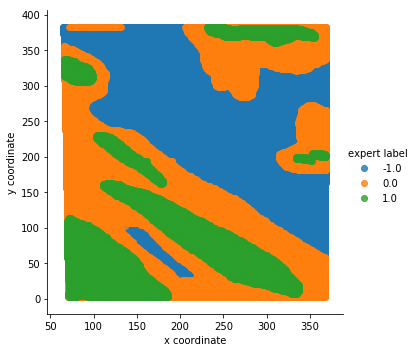

In [0]:
ax_image1 = sns.lmplot(x="x coordinate", y="y coordinate", hue = "expert label", data=image1, fit_reg=False)

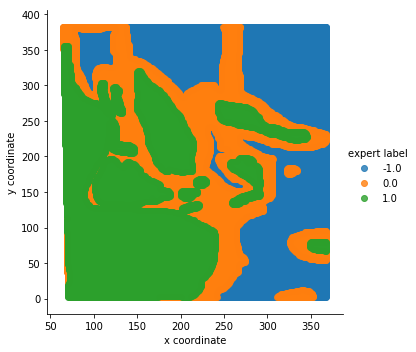

In [0]:
ax_image2 = sns.lmplot(x="x coordinate", y="y coordinate", hue = "expert label", data=image2, fit_reg=False)

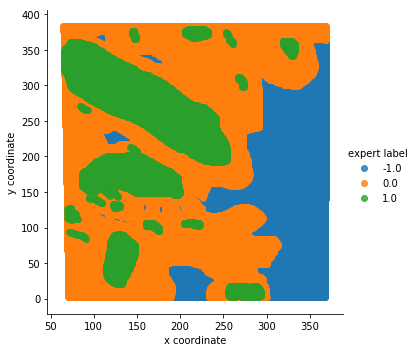

In [0]:
ax_image3 = sns.lmplot(x="x coordinate", y="y coordinate", hue = "expert label", data=image3, fit_reg=False)

In [0]:
g1 = sns.pairplot(image1)

In [0]:
g2 = sns.pairplot(image2)

In [0]:
# g3 = sns.pairplot(image3)

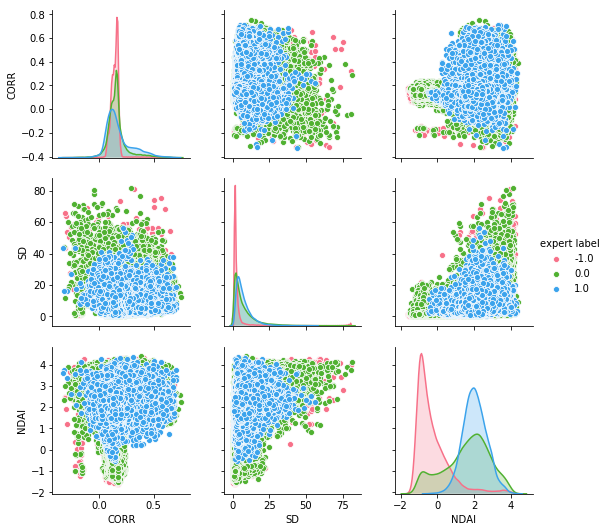

In [0]:
sns.pairplot(image1, hue="expert label", vars=["CORR", "SD", "NDAI"], palette="husl")

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


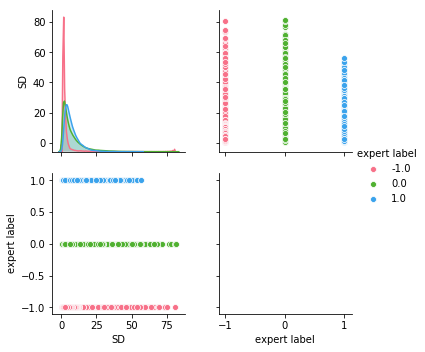

In [0]:
sns.pairplot(image1, hue="expert label", vars=["SD", "expert label"], palette="husl")

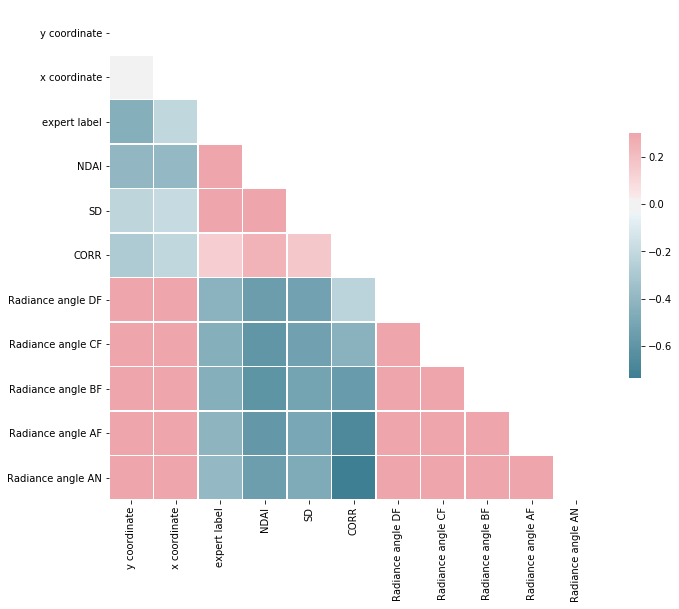

In [0]:
corr = image1.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
heatco = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [0]:
def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,y coordinate,x coordinate,expert label,NDAI,SD,CORR,Radiance angle DF,Radiance angle CF,Radiance angle BF,Radiance angle AF,Radiance angle AN
y coordinate,1,-0.0054,-0.45,-0.39,-0.22,-0.28,0.47,0.49,0.51,0.52,0.52
x coordinate,-0.0054,1,-0.21,-0.39,-0.19,-0.2,0.4,0.44,0.43,0.41,0.4
expert label,-0.45,-0.21,1,0.66,0.33,0.14,-0.43,-0.44,-0.44,-0.42,-0.38
NDAI,-0.39,-0.39,0.66,1,0.6,0.25,-0.55,-0.59,-0.6,-0.58,-0.54
SD,-0.22,-0.19,0.33,0.6,1,0.17,-0.53,-0.53,-0.52,-0.5,-0.47
CORR,-0.28,-0.2,0.14,0.25,0.17,1,-0.24,-0.43,-0.57,-0.67,-0.73
Radiance angle DF,0.47,0.4,-0.43,-0.55,-0.53,-0.24,1,0.94,0.89,0.85,0.81
Radiance angle CF,0.49,0.44,-0.44,-0.59,-0.53,-0.43,0.94,1,0.97,0.93,0.89
Radiance angle BF,0.51,0.43,-0.44,-0.6,-0.52,-0.57,0.89,0.97,1,0.98,0.95
Radiance angle AF,0.52,0.41,-0.42,-0.58,-0.5,-0.67,0.85,0.93,0.98,1,0.98


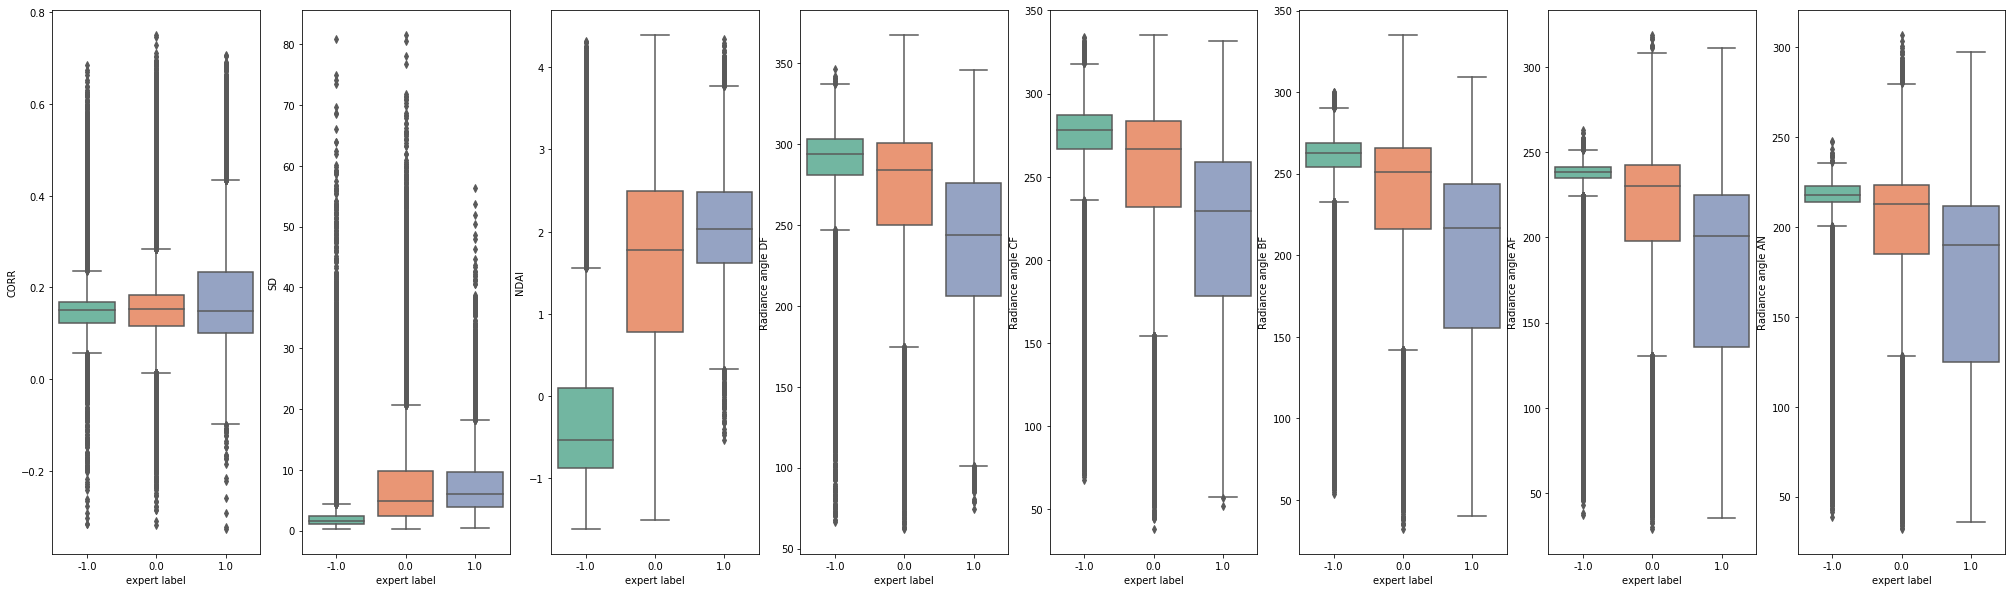

In [0]:
fig3, (ax1, ax2, ax3,ax4,ax5,ax6,ax7,ax8) = plt.subplots(1, 8, figsize=(35,10))
sns.boxplot(x="expert label", y="CORR", data=image1,palette="Set2",ax=ax1)
sns.boxplot(x="expert label", y="SD", data=image1,palette="Set2",ax=ax2)
sns.boxplot(x="expert label", y="NDAI", data=image1,palette="Set2",ax=ax3)
sns.boxplot(x="expert label", y="Radiance angle DF", data=image1,palette="Set2",ax=ax4)
sns.boxplot(x="expert label", y="Radiance angle CF", data=image1,palette="Set2",ax=ax5)
sns.boxplot(x="expert label", y="Radiance angle BF", data=image1,palette="Set2",ax=ax6)
sns.boxplot(x="expert label", y="Radiance angle AF", data=image1,palette="Set2",ax=ax7)
sns.boxplot(x="expert label", y="Radiance angle AN", data=image1,palette="Set2",ax=ax8)

##Problem 2 
####(a) (Data Split) Split the entire data (image1.txt, image2.txt, image3.txt) into three sets:
training, validation and test. Think carefully about how to split the data. Suggest at
least two non-trivial different ways of splitting the data which takes into account
that the data is not i.i.d.

#### Assumption:
1. Image1, Image2, Image3 can be merged together for the model training
2. Assume blocks are independent of each other
#### Explnation: 
smiliar x coordinates, and same y coordinates

In [0]:
# drop label 0 data (unlabeled) for different images
image1 = image1.loc[(image1['expert label'] == -1.0) | (image1['expert label'] == 1.0)]
image2 = image2.loc[(image2['expert label'] == -1.0) | (image2['expert label'] == 1.0)]
image3 = image3.loc[(image3['expert label'] == -1.0) | (image3['expert label'] == 1.0)]

In [0]:
for img_idx in range(len(data_files)):
  mask = data_files[img_idx]['expert label'] != 0
  data_files[img_idx] = data_files[img_idx][mask]

### **Method** 1
Split the data into 400 chunks according to x coordinate and y coordinate of the data


In [0]:
# create dictionary of x, y coordiate's basic information per image
# prepare for data splitting 
x_avg = 0
y_avg = 0
x_min = np.Inf
x_max = -np.Inf 
y_min = np.Inf
y_max = -np.Inf
data  = pd.DataFrame()
cor_max_min = {}
for i in range(3):
  name = "Image%d" %(i+1)
  data = pd.concat([data, data_files[i]])
  dat = data_files[i].describe()
  cur_ymin, cur_ymax = dat['y coordinate']["min"], dat['y coordinate']["max"]
  cur_xmin, cur_xmax = dat['x coordinate']["min"], dat['x coordinate']["max"]
  y_min = min(y_min, cur_ymin)
  y_max = max(y_max, cur_ymax)
  y_avg += float(cur_ymax - cur_ymin)
  x_min = min(x_min, cur_xmin)
  x_max = max(x_max, cur_xmax)
  x_avg += float(cur_xmax - cur_xmin)
  cor_max_min[name] = {"x_min":cur_xmin, 
                      "x_max": cur_xmax,
                      "y_min": cur_ymin,
                      "y_max": cur_ymax}
x_avg /= 3.0
y_avg /= 3.0

In [0]:
# calculate the trheshold for x coordinate and y coordinate respectively
step = [x_avg / 20, y_avg / 20]
x_mask = [x_min + i* step[0] for i in range(1,20)]
y_mask = [y_min + i* step[1] for i in range(1,20)]
x_mask.append(x_max)

In [0]:
# storing different chunks of data to dat_cor
dat_cor = []
temp_dat = data.copy()
# split data according to x, y coordinate of the data
for x in x_mask:
  mask = temp_dat['x coordinate'] <= x
  left = temp_dat[mask]
  temp_dat = temp_dat[~mask]
  for y in y_mask:
    mask2 = left['y coordinate'] < y
    dat_cor.append(left[mask2])
    left = left[~mask2]
    if y == y_mask[-1]:
      dat_cor.append(left)

In [0]:
"Training Set, Validation Set, Test Set Split"
# set random seed to gaurantee the reproductivity of 
# the code
np.random.seed(19981031)
# get the random index for selecting chunks for
# training set, validation set, test set respectively
idx = np.random.permutation(len(dat_cor))
train_num = int(len(idx) * 0.7) 
val_num = int(train_num + len(idx) * 0.2) 
test_num = int(val_num + len(idx) * 0.1) 
train = [dat_cor[i] for i in idx[:train_num]]
val = [dat_cor[i] for i in idx[train_num:val_num]]
test = [dat_cor[i] for i in idx[val_num:test_num]]
train_m, test_m, val_m = train[0], test[0], val[0]
# merge all the data chunks in traning set, val set, and test set
for index, i in enumerate(train[1:]):
  train_m = pd.concat([train_m, i])
  if index < len(test) - 1:
    test_m = pd.concat([test_m, test[index + 1]])
  if index < len(val) - 1:
    val_m = pd.concat([val_m, val[index + 1]])

In [0]:
# remember the index of the data chunks used for training set, and 
# validation set
train_val_idx  = idx[:val_num]

In [0]:
# Split the data into training features and labels
X_train = train_m.drop("expert label", axis=1)
y_train = train_m["expert label"]
X_val = val_m.drop("expert label", axis=1)
y_val = val_m["expert label"]
X_test = test_m.drop("expert label", axis=1)
y_test = test_m["expert label"]

 Since all images have similar x coordinate value, and same y coordinate value, we decide to seperate each image into 400 chunks according to 20 steps with same size within the average of all of images' x coordinate range, namely ...  and average value of all of images' y coordinate range namely ...

### Method 2 
1. Split image1, and Image3 into 130 chunks respectively using slashes with the same slope of the diagonal lines of the image1 and image3
2. Split image 2 into 130 chuncks according to y coordinates
#### Explanation: 
y = ax + b, if we fixed the slope, we can compared the data's y coordinate with the y value of the point on the line with specific b value to seperate the image into different data chuncks by the slash. 
Since image1 and image3 has the same minimum and maximum for x coordinate and y coordinate, those two images will have the same diagonal line, and we can use the smae slope and b_range while splitting the image for image1 and image3 

In [0]:
# calculate the slope of the diagonal line
slope = (0.0 - cor_max_min["Image1"]["y_max"]) / \
         cor_max_min["Image1"]["x_max"]
# calcualte the range for the intercept for each threshold slash
b_range = [(cor_max_min["Image1"]["y_min"]- slope*cor_max_min["Image1"]["x_min"]),\
           (cor_max_min["Image1"]["y_max"]- slope*cor_max_min["Image1"]["x_max"])]
step = (b_range[1] - b_range[0]) / 130
b_mask = [b_range[0] + i* step  for i in range(1,130)]
# calculate the y thresholds for splitting image2 
add_val = (cor_max_min["Image2"]["x_max"] - cor_max_min["Image2"]["x_min"]) * (1/130)
x_mask2 = [cor_max_min["Image2"]["x_min"] + i* add_val for i in range(1,130)]

In [0]:
x_mask2.append(cor_max_min["Image2"]["x_max"])
b_mask.append(b_range[1])

In [0]:
# storing different chunks of data into dat_list
dat_list = []
img = image1.copy()

# split image1
for b in b_mask:
  cur_y = slope*img['x coordinate'] + b
  mask = img['y coordinate'] <= cur_y
  dat_list.append(img[mask])
  img = img[~mask]

# split image3
img = image3.copy()
for b in b_mask:
  cur_y = slope*img['x coordinate'] + b
  mask = img['y coordinate'] <= cur_y
  dat_list.append(img[mask])
  img = img[~mask]

In [0]:
# split image2 according to y coordinates
temp_dat = image2.copy()
for x in x_mask2:
  mask = temp_dat['x coordinate'] <= x
  dat_list.append(temp_dat[mask])
  temp_dat = temp_dat[~mask]

In [0]:
"Training Set, Validation Set, Test Set Split"
# set random seed to gaurantee the reproductivity of 
# the code
np.random.seed(109876543) 
# get the random index for selecting chunks for
# training set, validation set, test set respectively
idx = np.random.permutation(len(dat_list))
train_num2 = int(len(idx) * 0.7) 
val_num2 = int(train_num2 + len(idx) * 0.2) 
test_num2 = int(val_num2 + len(idx) * 0.1) 
train2 = [dat_list[i] for i in idx[:train_num2]]
val2 = [dat_list[i] for i in idx[train_num2:val_num2]]
test2 = [dat_list[i] for i in idx[val_num2:test_num2]]
train_m2, test_m2, val_m2 = train2[0], test2[0], val2[0]
# merge all the data chunks in traning set, val set, and test set
for indx, i in enumerate(train2[1:]):
  train_m2 = pd.concat([train_m2, i])
  if indx < len(test2) - 1:
    test_m2 = pd.concat([test_m2, test2[indx + 1]])
  if indx < len(val2) - 1:
    val_m2 = pd.concat([val_m2, val2[indx + 1]]) 

In [0]:
# remember the index of the data chunks used for training set, and 
# validation set
val_idx2 = idx[train_num2:val_num2] 
train_val_idx2  = idx[:val_num2]

In [0]:
# Split the data into training features and labels
X_train2 = train_m2.drop("expert label", axis=1)
y_train2 = train_m2["expert label"]
X_val2 = val_m2.drop("expert label", axis=1)
y_val2 = val_m2["expert label"]
X_test2 = test_m2.drop("expert label", axis=1)
y_test2 = test_m2["expert label"]

####(b) (Baseline) Report the accuracy of a trivial classier which sets all labels to -1
(cloud-free) on the validation set and on the test set. In what scenarios will such a
classiffer have high average accuracy? Hint: Such a step provides a baseline to ensure
that the classification problems at hand is not trivial.

### Method 1 

In [29]:
# calculate the accuracy of trivial classifier on Test Set 
t_correct = 0
for i in y_test:
  if i == -1:
    t_correct += 1
print('Accuracy of the trivial classier on the Method 1 Test Set is %{}'.format(100 * t_correct / len(y_test)))


Accuracy of the trivial classier on the Method 1 Test Set is %58.16928645807507


In [0]:
# calculate the accuracy of trivial classifier on Val Set 
v_correct = 0
for i in y_val:
  if i == -1:
    v_correct += 1
print('Accuracy of the trivial classier on the Method 1 Validation Set is %{}'.format(100 * v_correct / len(y_val)))

Accuracy of the trivial classier on the Method 1 Validation Set is %60.7050500121981


### Method 2

In [0]:
# calculate the accuracy of trivial classifier on Test Set 
t_correct = 0
for i in y_test2:
  if i == -1:
    t_correct += 1
print('Accuracy of the trivial classier on the Method 2 Test Set is %{}'.format(100 * t_correct / len(y_test2)))

Accuracy of the trivial classier on the Method 2 Test Set is %58.01727375140818


In [0]:
# calculate the accuracy of trivial classifier on Val Set 
v_correct = 0
for i in y_val2:
  if i == -1:
    v_correct += 1
print('Accuracy of the trivial classier on the Method 2 Validation Set is %{}'.format(100 * v_correct / len(y_val2)))

Accuracy of the trivial classier on the Method 2 Validation Set is %60.60745211230648


#### (d) Write a generic cross validation (CV) function CVgeneric in R that takes a generic
classiffer, training features, training labels, number of folds K and a loss function (at
least classiffication accuracy should be there) as inputs and outputs the K-fold CV loss
on the training set. Please remember to put it in your github folder in Section 5.

In [0]:
def CVgeneric(clf, dat, k, loss_func, train_val_idx, test_dat, features=None,\
             verbose=True):
  """Input: 
     1. clf: generic classiffer,
     2. dat: training data chunks, 
     3. k: number of folds, 
     4. loss_func: loss function,
     5. train_val_idx: list of available index to select data chunks 
          from data chunks list if only consider data within training 
          set and validation set
     6. test_dat: list of test data in form of [features, labels]
     7. features list to train the model on: features (Default is all 8 features
          excluding x,y coordinates)
     8. verbose: if True, it will print out all loss, accuracy, and 
         test accuracy for all K-fold CV (Default is True)
     
   Output:
     1. K-fold CV loss on the training set(dictionary) in the form of 
          {"CV1":loss} : results
     2. K-fold CV accuracy on the val set(dictionary): accuracy
     3. K-fold CV test accuracy (dictionary): test_accuracy dic
     4. K-fold CV models(list): model_list """
  if features == None:
    features = list(dat[0].columns)[3:]
  num_examples = len(train_val_idx) # for choosing from train_val_idx 
  np.random.seed(1989)
  idx = np.random.permutation(num_examples)
  x_parts = [pd.DataFrame()]*k
  y_parts = [pd.DataFrame()]*k
  chunk_size = num_examples // k #each data chunk's size
  nums_dat = np.sum(list(map(lambda x: x.shape[0], [dat[i] for i in train_val_idx])))
  for i in range(k):
    st_i = i * chunk_size # starting index
    if i == k-1:
      end_i = num_examples 
    else:
      end_i = (i + 1) * chunk_size
    cur_idx = train_val_idx[idx][st_i:end_i]
    cur_x = [dat[i][features] for i in cur_idx] 
    cur_y = [dat[i]["expert label"] for i in cur_idx]
    for x in cur_x:
      x_parts[i] = pd.concat([x_parts[i], x], axis=0)
    for y in cur_y:
      y_parts[i] = pd.concat([y_parts[i], y], axis=0)
  assert np.sum(list(map(lambda x: x.shape[0], (xx for xx in x_parts)))) == nums_dat
  assert np.sum(list(map(lambda x: x.shape[0], (yy for yy in y_parts)))) == nums_dat
  results = {}
  accuracy = {}
  test_acc_dic = {}
  model_list = []
  workers = mp.Pool()
  for i in range(0, k):
    X_val, Y_val = x_parts[i].values, y_parts[i].values.reshape(-1,)
    X_train = pd.DataFrame()
    Y_train = pd.DataFrame()
    for cur in x_parts[:i]+x_parts[i+1:]:
      X_train = pd.concat([X_train, cur], axis=0)
    assert X_train.shape[0] + X_val.shape[0] == nums_dat
    for cur in y_parts[:i]+ y_parts[i+1:]:
      Y_train = pd.concat([Y_train, cur], axis=0)
    assert Y_train.shape[0] + Y_val.shape[0] == nums_dat
    w = workers.apply_async(clf.fit, args=(X_train.values, \
                                           Y_train.values.reshape(-1,)))
    model = w.get()
    model_list.append(model)
    if loss_func is metrics.log_loss:
      pred = model.predict_proba(X_val)
    else:
      pred = model.predict(X_val)
    loss = loss_func(Y_val, pred)
    results["CV%d" %(i+1)] =  loss
    acc = metrics.accuracy_score(Y_val,model.predict(X_val))
    accuracy["CV%d" %(i+1)] =  acc
    test_acc = metrics.accuracy_score(test_dat[1], model.predict(test_dat[0][features]))
    if verbose:
      print("CV", i+1, "mean loss: ", np.mean(loss))
      print("Accuracy for CV", i+1, ": %",acc*100)
      print("Test Accuracy for CV", i+1, ": %",test_acc*100)
      print(" ")
    test_acc_dic["CV%d" %(i+1)] =  test_acc
  workers.close()
  return results, accuracy, test_acc_dic, model_list

# Problem 3 Modeling
####(a) Try several classication methods and assess their t using cross-validation
(CV). Provide a commentary on the assumptions for the methods you tried
and if they are satised in this case. Since CV does not have a validation set, you
can merge your training and validation set to t your CV model. Report the accuracies
across folds (and not just the average across folds) and the test accuracy. CV-results for
both the ways of creating folds (as answered in part 2(a)) should be reported. Provide a
brief commentary on the results. Make sure you honestly mention all the classication
methods you have tried.

### Preprocess Data
#### Method 1

In [0]:
# auxiliary function for multiprocessing
def calc(a,b,c):
  return (a-b)/c

In [0]:
# standardize the data by subtract all data
# by the columnwise mean of the training data
# and then divide columnwise std
features = list(dat_cor[0].columns)[3:]
X_train_val = pd.concat([X_train, X_val],axis=0)
Y_train_val = pd.concat([y_train, y_val],axis=0)
X_des = X_train_val.describe()
miu_list = [X_des[i]['mean'] for i in features]
sig_list = [X_des[i]['std'] for i in features]
for index,miu in enumerate(miu_list):
  f = features[index]
  X_test[f] = (X_test[f] - miu) / sig_list[index]
  workers = mp.Pool()
  for dat_idx in range(len(dat_cor)):
    w = workers.apply_async(calc, \
                            args=(dat_cor[dat_idx][f],\
                                 miu, sig_list[index]))
    dat_cor[dat_idx][f] = w.get()
  workers.close()
#     dat_cor[dat_idx][f] = (dat_cor[dat_idx][f] - miu) / sig_list[index]

#### Method 2

In [0]:
# standardize the data by subtract all data
# by the columnwise mean of the training data
# and then divide columnwise std
X_train_val2 = pd.concat([X_train2, X_val2],axis=0)
Y_train_val2 = pd.concat([y_train2, y_val2],axis=0)
X_des2 = X_train_val2.describe()
miu_list2 = [X_des2[i]['mean'] for i in features]
sig_list2 = [X_des2[i]['std'] for i in features]
for index,miu in enumerate(miu_list2):
  f = features[index]
  workers = mp.Pool()
  for dat_idx in range(len(dat_list)):
    w = workers.apply_async(calc, \
                        args=(dat_list[dat_idx][f],\
                             miu, sig_list2[index]))
    dat_list[dat_idx][f] = w.get()
  w2 = workers.apply_async(calc, \
                      args=(X_test2[f],\
                           miu, sig_list2[index]))
  X_test2[f] = w2.get()
#     dat_list[dat_idx][f] = (dat_list[dat_idx][f] - miu) / sig_list2[index]
#   X_test2[f] = (X_test2[f] - miu) / sig_list2[index]

In [0]:
# These are the "Tableau 20" colors as RGB.    
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)] 
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.) 

### Classifier 1 Logistic Regression

#### Method 1 data

In [116]:
clf1 = linear_model.LogisticRegression(solver = 'lbfgs', multi_class='multinomial')
loss_func1 = metrics.log_loss
loss_list1, accuracy1, test_accuracy1, model_list1 = CVgeneric(clf1, dat_cor, 5, loss_func1, \
           train_val_idx=train_val_idx, test_dat=[X_test, y_test])
lr_avg_tac = np.mean([test_accuracy1[k] for k in test_accuracy1.keys()])
lr_avg_ac = np.mean([accuracy1[k] for k in accuracy1.keys()])
print("Average 5-folds CV Validation Accuracy(Logistic Regression): %", (lr_avg_ac)*100)
print("Average Test Accuracy(Logistic Regression): %", (lr_avg_tac)*100)

CV 1 mean loss:  0.22961137934974726
Accuracy for CV 1 : % 91.46985872964521
Test Accuracy for CV 1 : % 91.69435215946844
 
CV 2 mean loss:  0.25738730546274585
Accuracy for CV 2 : % 89.69246367015884
Test Accuracy for CV 2 : % 91.4513809689096
 
CV 3 mean loss:  0.35371180361577403
Accuracy for CV 3 : % 86.0049207650996
Test Accuracy for CV 3 : % 91.9769921158328
 
CV 4 mean loss:  0.279626368891083
Accuracy for CV 4 : % 87.80949728450076
Test Accuracy for CV 4 : % 90.8315565031983
 
CV 5 mean loss:  0.27236227653276146
Accuracy for CV 5 : % 88.07693303305635
Test Accuracy for CV 5 : % 91.00014875787177
 
Average 5-folds CV Validation Accuracy(Logistic Regression): % 88.61073469649214
Average Test Accuracy(Logistic Regression): % 91.39088610105617


AUC: 0.980


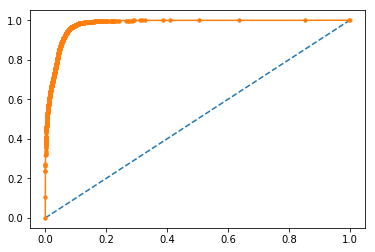

In [118]:
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
probs = model_list1[4].predict_proba(X_test[features])
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

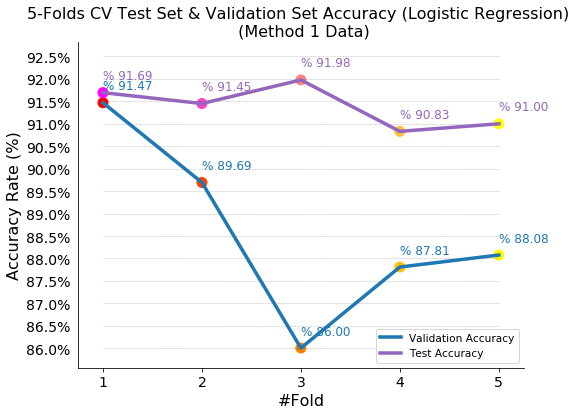

In [0]:
# plot Test Set Accuracy and Validation Set Accuracy
plt.figure(10, figsize=(8, 6))
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)    
# Ensure that the axis ticks only show up on the bottom and left of the plot.    
# Ticks on the right and top of the plot are generally unnecessary chartjunk.    
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left() 
# Make sure your axis ticks are large enough to be easily read.    
# You don't want your viewers squinting to read your plot.    
plt.yticks(np.arange(86, 93, 0.5), ["%.1f" %x + "%" 
                                           for x in np.arange(86, 93, 0.5)], 
           fontsize=14)  
x2 = np.arange(1,6,1)
plt.xticks(x2,fontsize=14)
for y in np.arange(86, 93, 0.5):
  x = np.arange(1, len(accuracy1)+1)
  plt.plot(x,[y]*len(x), "--", \
             lw=0.5, color="black", alpha=0.3) 
#Remove the tick marks; they are unnecessary with the tick lines we just plotted.    
plt.tick_params(axis="both", which="both", bottom="on", top="off",    
                labelbottom="on", left="off", right="off", labelleft="on")
val_y = [accuracy1[k]*100 for k in accuracy1.keys()]
plt.plot(x2, val_y,
         color=tableau20[0],lw=3.5, label="Validation Accuracy")
plt.scatter(x2, val_y, c=x2,
           cmap = plt.cm.autumn, s=100)

test_y = [test_accuracy1[k]*100 for k in test_accuracy1.keys()]
plt.plot(x2, test_y,
          color=tableau20[8],lw=3.5, label="Test Accuracy")
plt.scatter(x2, test_y, c=x2,
           cmap = plt.cm.spring, s=100)
for i, txt in enumerate(test_y):
    ax.annotate("%"+ " %.2f" %txt, (x2[i], txt+0.3), color=tableau20[8], 
                fontsize=12)
    ax.annotate("% " + "%.2f" %val_y[i],(x2[i], val_y[i]+0.3), 
                color=tableau20[0], fontsize=12)
plt.title("5-Folds CV Test Set & Validation Set Accuracy (Logistic Regression) \n (Method 1 Data)", 
          fontsize=16)
plt.xlabel("#Fold", fontsize=16)
plt.ylabel("Accuracy Rate (%)", fontsize=16)
ax.legend(loc="lower right", fontsize=10.5)
plt.show()

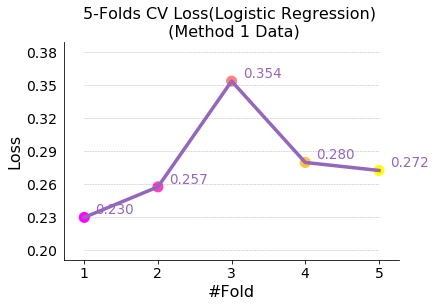

In [0]:
# Plot Loss
plt.figure(100, figsize=(6, 4))
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)    
# Ensure that the axis ticks only show up on the bottom and left of the plot.    
# Ticks on the right and top of the plot are generally unnecessary chartjunk.    
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left() 
# Make sure your axis ticks are large enough to be easily read.    
# You don't want your viewers squinting to read your plot.    
plt.yticks(np.arange(0.20, 0.39, 0.03), ["%.2f" %x 
                                           for x in np.arange(0.20, 0.39, 0.03)], 
           fontsize=14)  
x2 = np.arange(1,6,1)
plt.xticks(x2,fontsize=14)
for y in np.arange(0.20, 0.39, 0.03):
  x = np.arange(1, len(loss_list1)+1)
  plt.plot(x,[y]*len(x), "--", \
             lw=0.5, color="black", alpha=0.3) 
#Remove the tick marks; they are unnecessary with the tick lines we just plotted.    
plt.tick_params(axis="both", which="both", bottom="on", top="off",    
                labelbottom="on", left="off", right="off", labelleft="on")
y = [loss_list1[k] for k in loss_list1.keys()]
plt.plot(x2, y,
         color=tableau20[8],lw=3.5)
plt.scatter(x2, y, c=x2,
           cmap = plt.cm.spring, s=100)

for i, txt in enumerate(y):
    ax.annotate("%.3f" %txt, (x2[i]+0.15, txt+0.003), color=tableau20[8], 
                fontsize=13.5)
plt.title("5-Folds CV Loss(Logistic Regression) \n (Method 1 Data)", 
          fontsize=16)
plt.xlabel("#Fold", fontsize=16)
plt.ylabel("Loss", fontsize=16)
plt.show()

#### ROC Method 1 Data:

The optimal cut off point would be where true positive rate is high and the false positive rate is low.

In [0]:
def find_optimal_cutoff(fpr, tpr, threshold):
    """ Find the optimal probability cutoff point for a classification model related to event rate
    Input
    ----------
    fpr: False Positive Rate
    tpr: True Positive Rate
    threshold: threshold
    
    Output
    -------     
    optimal cutoff value

    """
    optimal_idx = np.argmax(tpr - fpr)
    return threshold[optimal_idx]

In [0]:
best_idx_lr = eval(max(test_accuracy1, key=test_accuracy1.get)[2]) - 1
#calc ROC
model=model_list1[best_idx_lr]
fpr_lr, tpr_lr, thre_lr = metrics.roc_curve(y_test, model.predict_proba(X_test[features])[:, 1])
roc_auc_lr = metrics.auc(fpr_lr, tpr_lr)

#### Method 2 data

In [121]:
clf2 = linear_model.LogisticRegression(solver = 'lbfgs', multi_class='multinomial')
loss_list2, accuracy2, test_accuracy2, model_list2 = CVgeneric(clf2, dat_list, 5, loss_func1, \
           train_val_idx=train_val_idx2, test_dat=[X_test2, y_test2])
lr_avg_tac2 = np.mean([test_accuracy2[k] for k in test_accuracy2.keys()])
lr_avg_ac2 = np.mean([accuracy2[k] for k in accuracy2.keys()])
print("Average 5-folds CV Validation Accuracy(Logistic Regression): %", (lr_avg_ac2)*100)
print("Average Test Accuracy(Logistic Regression): %", (lr_avg_tac2)*100)

CV 1 mean loss:  0.27529741265443347
Accuracy for CV 1 : % 89.92999740731138
Test Accuracy for CV 1 : % 91.23169357867067
 
CV 2 mean loss:  0.2730247773347674
Accuracy for CV 2 : % 89.06630787977254
Test Accuracy for CV 2 : % 91.33026661659783
 
CV 3 mean loss:  0.28768678877916865
Accuracy for CV 3 : % 87.10700346921075
Test Accuracy for CV 3 : % 91.35843034171987
 
CV 4 mean loss:  0.3175623176911979
Accuracy for CV 4 : % 86.40812715806295
Test Accuracy for CV 4 : % 91.36781825009388
 
CV 5 mean loss:  0.217746767548064
Accuracy for CV 5 : % 91.18732363794226
Test Accuracy for CV 5 : % 91.24577544123169
 
Average 5-folds CV Validation Accuracy(Logistic Regression): % 88.73975191045999
Average Test Accuracy(Logistic Regression): % 91.30679684566279


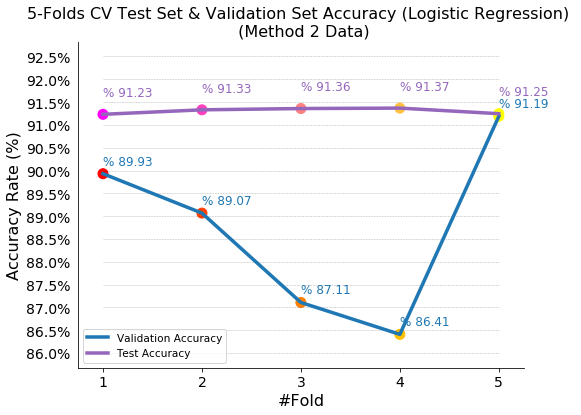

In [0]:
# plot Test Set Accuracy and Validation Set Accuracy
plt.figure(10, figsize=(8, 6))
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)    
# Ensure that the axis ticks only show up on the bottom and left of the plot.    
# Ticks on the right and top of the plot are generally unnecessary chartjunk.    
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left() 
# Make sure your axis ticks are large enough to be easily read.    
# You don't want your viewers squinting to read your plot.    
plt.yticks(np.arange(86, 93, 0.5), ["%.1f" %x + "%" 
                                           for x in np.arange(86, 93, 0.5)], 
           fontsize=14)  
x2 = np.arange(1,6,1)
plt.xticks(x2,fontsize=14)
for y in np.arange(86, 93, 0.5):
  x = np.arange(1, len(accuracy1)+1)
  plt.plot(x,[y]*len(x), "--", \
             lw=0.5, color="black", alpha=0.3) 
#Remove the tick marks; they are unnecessary with the tick lines we just plotted.    
plt.tick_params(axis="both", which="both", bottom="on", top="off",    
                labelbottom="on", left="off", right="off", labelleft="on")
val_y = [accuracy2[k]*100 for k in accuracy2.keys()]
plt.plot(x2, val_y,
         color=tableau20[0],lw=3.5, label="Validation Accuracy")
plt.scatter(x2, val_y, c=x2,
           cmap = plt.cm.autumn, s=100)

test_y = [test_accuracy2[k]*100 for k in test_accuracy2.keys()]
plt.plot(x2, test_y,
          color=tableau20[8],lw=3.5, label="Test Accuracy")
plt.scatter(x2, test_y, c=x2,
           cmap = plt.cm.spring, s=100)
for i, txt in enumerate(test_y):
    ax.annotate("%"+ " %.2f" %txt, (x2[i], txt+0.4), color=tableau20[8], 
                fontsize=12)
    ax.annotate("% " + "%.2f" %val_y[i],(x2[i], val_y[i]+0.2), 
                color=tableau20[0], fontsize=12)
plt.title("5-Folds CV Test Set & Validation Set Accuracy (Logistic Regression) \n (Method 2 Data)", 
          fontsize=16)
plt.xlabel("#Fold", fontsize=16)
plt.ylabel("Accuracy Rate (%)", fontsize=16)
ax.legend(loc="lower left", fontsize=10.5)
plt.show()

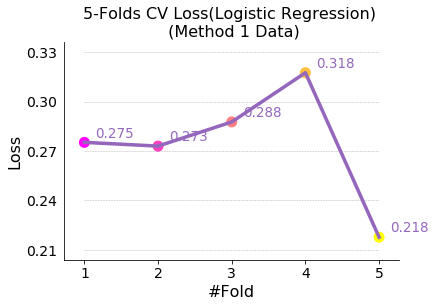

In [0]:
# Plot Loss
plt.figure(100, figsize=(6, 4))
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)    
# Ensure that the axis ticks only show up on the bottom and left of the plot.    
# Ticks on the right and top of the plot are generally unnecessary chartjunk.    
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left() 
# Make sure your axis ticks are large enough to be easily read.    
# You don't want your viewers squinting to read your plot.    
plt.yticks(np.arange(0.21, 0.35, 0.03), ["%.2f" %x 
                                           for x in np.arange(0.21, 0.35, 0.03)], 
           fontsize=14)  
x2 = np.arange(1,6,1)
plt.xticks(x2,fontsize=14)
for y in np.arange(0.21, 0.35, 0.03):
  x = np.arange(1, len(loss_list2)+1)
  plt.plot(x,[y]*len(x), "--", \
             lw=0.5, color="black", alpha=0.3) 
#Remove the tick marks; they are unnecessary with the tick lines we just plotted.    
plt.tick_params(axis="both", which="both", bottom="on", top="off",    
                labelbottom="on", left="off", right="off", labelleft="on")
y = [loss_list2[k] for k in loss_list2.keys()]
plt.plot(x2, y,
         color=tableau20[8],lw=3.5)
plt.scatter(x2, y, c=x2,
           cmap = plt.cm.spring, s=100)

for i, txt in enumerate(y):
    ax.annotate("%.3f" %txt, (x2[i]+0.15, txt+0.003), color=tableau20[8], 
                fontsize=13.5)
plt.title("5-Folds CV Loss(Logistic Regression) \n (Method 1 Data)", 
          fontsize=16)
plt.xlabel("#Fold", fontsize=16)
plt.ylabel("Loss", fontsize=16)
plt.show()

#### Calc ROC

In [0]:
best_idx_lr2 = eval(max(test_accuracy2, key=test_accuracy2.get)[2]) - 1
#calc ROC
model=model_list2[best_idx_lr2]
fpr2, tpr2, thre2 = metrics.roc_curve(y_test2, model.predict_proba(X_test2[features])[:, 1])
roc_auc_lr2 = metrics.auc(fpr2, tpr2)

###Classifier 2 QDA
####Assumption:
1. QDA assume the the predictor variables X are drawn from a multivariate Gaussian (aka normal) distribution. 
2. QDA require the number of predictor variables (p) to be less then the sample size (n). Furthermore, its important to keep in mind that performance will severely decline as p approaches n. A simple rule of thumb is to use QDA on data sets where n ≥ 5 × p .

Check Assumption

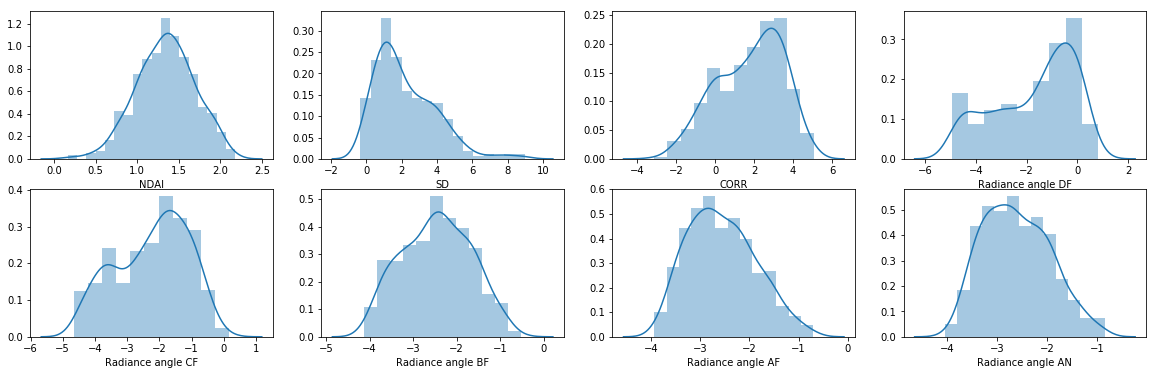

In [0]:
fig, ((ax1, ax2, ax3,ax4),(ax5,ax6,ax7,ax8)) = plt.subplots(2, 4, figsize=(20,6))
dd=dat_cor[103]
sns.distplot(dd['NDAI'],ax=ax1)
sns.distplot(dd['SD'],ax=ax2)
sns.distplot(dd['CORR'],ax=ax3)
sns.distplot(dd['Radiance angle DF'],ax=ax4)
sns.distplot(dd['Radiance angle CF'],ax=ax5)
sns.distplot(dd['Radiance angle BF'],ax=ax6)
sns.distplot(dd['Radiance angle AF'],ax=ax7)
sns.distplot(dd['Radiance angle AN'],ax=ax8)

#### Method 1data:

In [123]:
# calculate the prior probabilty for method 1 data
prior = [np.sum(label==-1 for label in Y_train_val), \
         np.sum(label==1 for label in Y_train_val)]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  """Entry point for launching an IPython kernel.


In [124]:
clf_qda = discriminant_analysis.QuadraticDiscriminantAnalysis(priors=prior)
loss_qda, acc_qda, tac_qda, model_qda = CVgeneric(clf_qda, dat_cor, 5, loss_func1, \
           train_val_idx=train_val_idx, test_dat=[X_test, y_test])
qda_avg_tac = np.mean([tac_qda[k] for k in tac_qda.keys()])
qda_avg_ac = np.mean([acc_qda[k] for k in acc_qda.keys()])
print("Average 5-folds CV Validation Accuracy(QDA): %", (qda_avg_ac)*100)
print("Average Test Accuracy(QDA): %", (qda_avg_tac)*100)

CV 1 mean loss:  0.495608618031729
Accuracy for CV 1 : % 91.60465868650923
Test Accuracy for CV 1 : % 92.1307085833292
 
CV 2 mean loss:  0.7071577072671463
Accuracy for CV 2 : % 89.0711518964307
Test Accuracy for CV 2 : % 91.99682649873556
 
CV 3 mean loss:  1.262779294102361
Accuracy for CV 3 : % 87.0419852377047
Test Accuracy for CV 3 : % 92.63648534734963
 
CV 4 mean loss:  0.5623572510503052
Accuracy for CV 4 : % 88.2105556329202
Test Accuracy for CV 4 : % 92.03649526454109
 
CV 5 mean loss:  0.7894768305878626
Accuracy for CV 5 : % 87.1605705262613
Test Accuracy for CV 5 : % 91.82823424406207
 
Average 5-folds CV Validation Accuracy(QDA): % 88.61778439596522
Average Test Accuracy(QDA): % 92.12574998760351


#### Calc ROC

In [0]:
best_idx_qda = eval(max(tac_qda, key=tac_qda.get)[2]) - 1
#calc ROC
model=model_qda[best_idx_qda]
fpr_qda, tpr_qda, thre_qda = metrics.roc_curve(y_test, model.predict_proba(X_test[features])[:, 1])
roc_auc_qda = metrics.auc(fpr_qda, tpr_qda)

#### Method 2 Data:

Check Assumption 

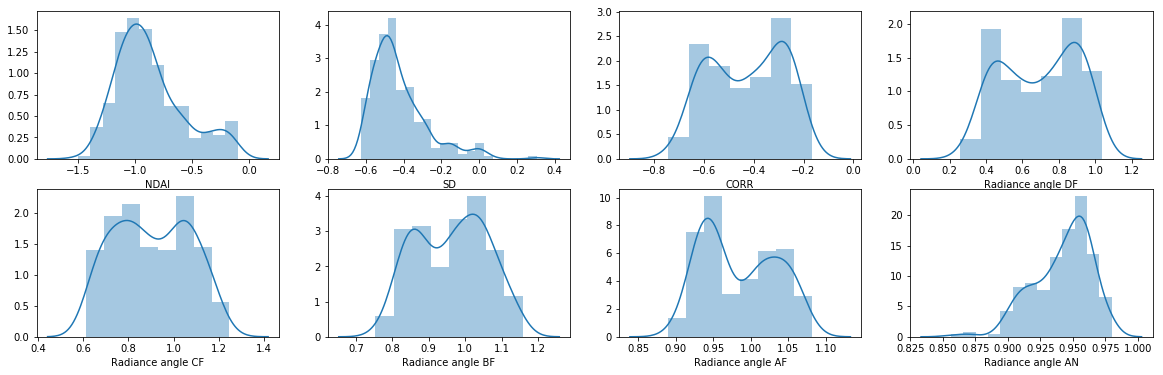

In [0]:
fig, ((ax1, ax2, ax3,ax4),(ax5,ax6,ax7,ax8)) = plt.subplots(2, 4, figsize=(20,6))
dd=dat_list[99]
sns.distplot(dd['NDAI'],ax=ax1)
sns.distplot(dd['SD'],ax=ax2)
sns.distplot(dd['CORR'],ax=ax3)
sns.distplot(dd['Radiance angle DF'],ax=ax4)
sns.distplot(dd['Radiance angle CF'],ax=ax5)
sns.distplot(dd['Radiance angle BF'],ax=ax6)
sns.distplot(dd['Radiance angle AF'],ax=ax7)
sns.distplot(dd['Radiance angle AN'],ax=ax8)

In [129]:
# calculate the prior probabilty for method 2 data
prior2 = [np.sum(label==-1 for label in Y_train_val2), \
         np.sum(label==1 for label in Y_train_val2)]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  """Entry point for launching an IPython kernel.


In [130]:
clf_qda2 = discriminant_analysis.QuadraticDiscriminantAnalysis(priors=prior2)
loss_qda2, acc_qda2, tac_qda2, model_qda2 = CVgeneric(clf_qda2, dat_list, 5, loss_func1, \
           train_val_idx=train_val_idx2, test_dat=[X_test2, y_test2])
qda_avg_tac2 = np.mean([tac_qda2[k] for k in tac_qda2.keys()])
qda_avg_ac2 = np.mean([acc_qda2[k] for k in acc_qda2.keys()])
print("Average 5-folds CV Validation Accuracy(QDA): %", (qda_avg_ac2)*100)
print("Average Test Accuracy(QDA): %", (qda_avg_tac2)*100)

CV 1 mean loss:  0.7310637759131452
Accuracy for CV 1 : % 89.37256935442053
Test Accuracy for CV 1 : % 89.46676680435598
 
CV 2 mean loss:  0.7817814466097209
Accuracy for CV 2 : % 89.78726645004062
Test Accuracy for CV 2 : % 89.72024033045437
 
CV 3 mean loss:  0.6901183148372766
Accuracy for CV 3 : % 86.9254119687771
Test Accuracy for CV 3 : % 89.52309425460008
 
CV 4 mean loss:  0.9727009942181601
Accuracy for CV 4 : % 86.6735153953714
Test Accuracy for CV 4 : % 89.71085242208035
 
CV 5 mean loss:  0.6007903491810459
Accuracy for CV 5 : % 91.67299761232907
Test Accuracy for CV 5 : % 89.38227562898986
 
Average 5-folds CV Validation Accuracy(QDA): % 88.88635215618775
Average Test Accuracy(QDA): % 89.56064588809613


#### Calc ROC

In [0]:
best_idx_qda2 = eval(max(tac_qda2, key=tac_qda2.get)[2]) - 1
#calc ROC
model=model_qda2[best_idx_qda2]
fpr_qda2, tpr_qda2, thre_qda2 = metrics.roc_curve(y_test2, model.predict_proba(X_test2[features])[:, 1])
roc_auc_qda2 = metrics.auc(fpr_qda2, tpr_qda2)
# # calc optimal cutoff value
# optimal_cutoff_qda2 = find_optimal_cutoff(fpr_qda2,tpr_qda2,thre_qda2)

###Classifier 3 K-Nearst-Neighbors
####Assumption:


#### Method 1 Data:

In [0]:
# hyperperameter tunning
n_neigh_list = [15, 30, 35, 40, 45]
acs_knn, tacs_knn,models_knn, loss_knn,avg_tac = [], [], [], [],[]
for n in n_neigh_list:
  print("--------Hyperperameter N_neighbors = %d----------" %n)
  classifier = neighbors.KNeighborsClassifier(n_neighbors=n)
  cur_los, cur_ac, cur_tac, cur_model = CVgeneric(clf=classifier, dat=dat_cor, \
                                                  k=3, loss_func=loss_func1, \
             train_val_idx=train_val_idx,\
             test_dat=[X_test, y_test])
  loss_knn.append(cur_los)
  acs_knn.append(cur_ac)
  tacs_knn.append(cur_tac)
  models_knn.append(cur_model)
  avg_tac.append(np.mean([cur_tac[k] for k in cur_tac.keys()]))
  print("Average Test Accuracy: %", (avg_tac[-1])*100)

--------Hyperperameter N_neighbors = 15----------
CV 1 mean loss:  0.2727753134892929
Accuracy for CV 1 : % 95.11816019032514
Test Accuracy for CV 1 : % 94.91743938116726
 
CV 2 mean loss:  0.5306990447898348
Accuracy for CV 2 : % 92.09103305590821
Test Accuracy for CV 2 : % 94.3174492983587
 
CV 3 mean loss:  0.30752494193626234
Accuracy for CV 3 : % 94.0713922972331
Test Accuracy for CV 3 : % 94.35215946843853
 
Average Test Accuracy: % 94.5290160493215
--------Hyperperameter N_neighbors = 30----------
CV 1 mean loss:  0.19391182434588236
Accuracy for CV 1 : % 95.12133227597145
Test Accuracy for CV 1 : % 94.96702533842416
 
CV 2 mean loss:  0.3577400553648921
Accuracy for CV 2 : % 91.94840206266359
Test Accuracy for CV 2 : % 94.01993355481729
 
CV 3 mean loss:  0.2244815911654662
Accuracy for CV 3 : % 94.0124174762053
Test Accuracy for CV 3 : % 94.22819457529627
 
Average Test Accuracy: % 94.40505115617924
--------Hyperperameter N_neighbors = 35----------
CV 1 mean loss:  0.184415058

In [0]:
# save model
import pickle
for idx,m in enumerate(models_knn):
  for idx2, cv in enumerate(m):
    filename = './models/knn_method1_mode%d_cv%d.sav' %(idx,idx2)
    pickle.dump(cv, open(filename, 'wb'))

In [0]:
# print out the best #neighbors for KNN according to average test accuracy
best_tac = avg_tac.index(max(avg_tac))
print(n_neigh_list[best_tac])

35


In [0]:
import warnings
warnings.filterwarnings("ignore")

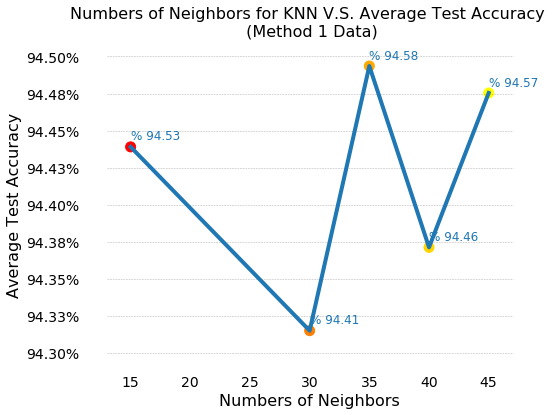

In [0]:
# plot for hyperperameter tuning
plt.figure(2, figsize=(8, 6))
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 
# Ensure that the axis ticks only show up on the bottom and left of the plot.    
# Ticks on the right and top of the plot are generally unnecessary chartjunk.    
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left() 
# Make sure your axis ticks are large enough to be easily read.    
# You don't want your viewers squinting to read your plot.    
plt.yticks(np.arange(94.39, 94.6, 0.025), ["%.2f" %x + "%" for x in np.arange(94.3, 94.6, 0.025)], 
           fontsize=14)    
plt.xticks(fontsize=14)
for y in np.arange(94.39, 94.6, 0.025):
  x = np.arange(n_neigh_list[0]-2,n_neigh_list[-1]+3)
  plt.plot(x,[y]*len(x), "--", \
             lw=0.5, color="black", alpha=0.3) 
  
ata = [acc*100 for acc in avg_tac]
#Remove the tick marks; they are unnecessary with the tick lines we just plotted.    
plt.tick_params(axis="both", which="both", bottom="off", top="off",    
                labelbottom="on", left="off", right="off", labelleft="on")
plt.plot(n_neigh_list, ata,
         lw=2.5, color=tableau20[0],linewidth=4)
plt.scatter(n_neigh_list, ata, c=n_neigh_list,
           cmap = plt.cm.autumn, s=100)
plt.plot(n_neigh_list, ata2,
         lw=2.5, color=tableau20[0],linewidth=4)
plt.scatter(n_neigh_list, ata, c=n_neigh_list,
           cmap = plt.cm.autumn, s=100)

for i, txt in enumerate(ata):
    ax.annotate("%"+ " %.2f" %txt, (n_neigh_list[i], txt+0.005), color=tableau20[0], 
                fontsize=12)
plt.title("Numbers of Neighbors for KNN V.S. Average Test Accuracy \n (Method 1 Data)",
          fontsize=16)
plt.xlabel("Numbers of Neighbors", fontsize=16)
plt.ylabel("Average Test Accuracy", fontsize=16)
plt.show()

In [0]:
# load the model from disk
mods = []
for i in range(5):
  cur = []
  for j in range(3):
      filename = './models/knn_method1_mode%d_cv%d.sav' %(i,j)
      cur.append(pickle.load(open(filename, 'rb')))
  mods.append(cur)

#### Calc ROC

In [0]:
# best_idx_knn = eval(max(tacs_knn[2], key=tacs_knn[2].get)[2]) - 1
#calc ROC
model=mods[3][2]
fpr_knn, tpr_knn, thre_knn = metrics.roc_curve(y_test, model.predict_proba(X_test[features])[:, 1])
roc_auc_knn = metrics.auc(fpr_knn, tpr_knn)

### Method 2 Data:

In [0]:
acs_knn2, tacs_knn2, models_knn2, loss_knn2, avg_tac2 = [], [], [], [], []
for n in n_neigh_list:
  print("--------Hyperperameter N_neighbors = %d----------" %n)
  classifier = neighbors.KNeighborsClassifier(n_neighbors=n)
  cur_los, cur_ac, cur_tac, cur_model = CVgeneric(classifier, dat_list, 3, 
                                                  loss_func1, 
                                                  train_val_idx=train_val_idx2,
                                                  test_dat=[X_test2, y_test2])
  loss_knn2.append(cur_los)
  acs_knn2.append(cur_ac)
  tacs_knn2.append(cur_tac)
  models_knn2.append(cur_model)
  avg_tac2.append(np.mean([cur_tac[k] for k in cur_tac.keys()]))
  print("Average Test Accuracy: %", (avg_tac2[-1])*100)

--------Hyperperameter N_neighbors = 15----------
CV 1 mean loss:  0.24075527179480044
Accuracy for CV 1 : % 94.34950690335306
Test Accuracy for CV 1 : % 95.86462636124672
 
CV 2 mean loss:  0.3477807064486804
Accuracy for CV 2 : % 93.64627857805631
Test Accuracy for CV 2 : % 96.06646639128802
 
CV 3 mean loss:  0.21520764883676582
Accuracy for CV 3 : % 95.3678805017262
Test Accuracy for CV 3 : % 95.93503567405182
 
Average Test Accuracy: % 95.95537614219552
--------Hyperperameter N_neighbors = 30----------
CV 1 mean loss:  0.18093140268261954
Accuracy for CV 1 : % 94.14280078895464
Test Accuracy for CV 1 : % 95.84585054449869
 
CV 2 mean loss:  0.25429351321344074
Accuracy for CV 2 : % 93.51394107178169
Test Accuracy for CV 2 : % 96.01952684941794
 
CV 3 mean loss:  0.1575731328548232
Accuracy for CV 3 : % 95.33665272982773
Test Accuracy for CV 3 : % 95.84585054449869
 
Average Test Accuracy: % 95.90374264613844
--------Hyperperameter N_neighbors = 35----------
CV 1 mean loss:  0.1718

In [0]:
# # save model for future usage
# import pickle
# for idx,m in enumerate(models_knn2):
#   for idx2, cv in enumerate(m):
#     filename = './models/knn_method2_mode%d_cv%d.sav' %(idx,idx2)
#     pickle.dump(cv, open(filename, 'wb'))

In [0]:
# load the model from disk
mods = []
for i in range(5):
  cur = []
  for j in range(3):
      filename = './models/knn_method2_mode%d_cv%d.sav' %(i,j)
      cur.append(pickle.load(open(filename, 'rb')))
  mods.append(cur)

In [0]:
# print out the best #neighbors for KNN according to average test accuracy
best_tac2 = avg_tac2.index(max(avg_tac2))
print(n_neigh_list[best_tac2])

35


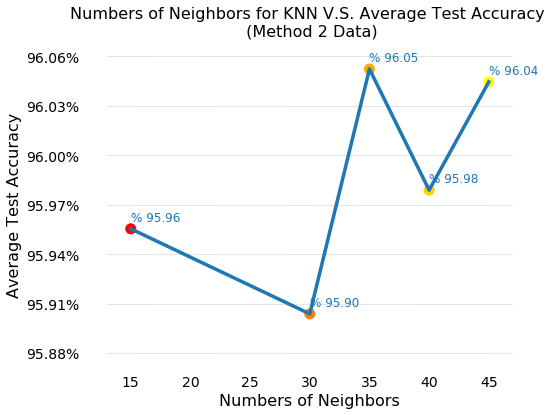

In [0]:
# plot for hyperperameter tuning
plt.figure(3, figsize=(8, 6))
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 
# Ensure that the axis ticks only show up on the bottom and left of the plot.    
# Ticks on the right and top of the plot are generally unnecessary chartjunk.    
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left() 
# Make sure your axis ticks are large enough to be easily read.    
# You don't want your viewers squinting to read your plot.    
plt.yticks(np.arange(95.88, 96.08, 0.03), ["%.2f" %x + "%" 
                                           for x in np.arange(95.88, 96.08, 0.03)], 
           fontsize=14)    
plt.xticks(fontsize=14)
for y in np.arange(95.88, 96.08, 0.03):
  x = np.arange(n_neigh_list[0]-2,n_neigh_list[-1]+3)
  plt.plot(x,[y]*len(x), "--", \
             lw=0.5, color="black", alpha=0.3) 
#Remove the tick marks; they are unnecessary with the tick lines we just plotted.    
plt.tick_params(axis="both", which="both", bottom="off", top="off",    
                labelbottom="on", left="off", right="off", labelleft="on")
ata = [acc*100 for acc in avg_tac2]
plt.plot(n_neigh_list, ata,
         lw=3.5, color=tableau20[0])
plt.scatter(n_neigh_list, ata, c=n_neigh_list,
           cmap = plt.cm.autumn, s=100)

for i, txt in enumerate(ata):
    ax.annotate("%"+ " %.2f" %txt, (n_neigh_list[i], txt+0.005), color=tableau20[0], 
                fontsize=12)

plt.title("Numbers of Neighbors for KNN V.S. Average Test Accuracy \n (Method 2 Data)", 
          fontsize=16)
plt.xlabel("Numbers of Neighbors", fontsize=16)
plt.ylabel("Average Test Accuracy", fontsize=16)
plt.show()

#### Clac ROC

In [0]:
# best_idx_knn2 = eval(max(tacs_knn2[2], key=tacs_knn2[2].get)[2]) - 1
#calc ROC
model= mods[3][2]#models_knn2[2][best_idx_knn2]
fpr_knn2, tpr_knn2, thre_knn2 = metrics.roc_curve(y_test2, model.predict_proba(X_test2[features])[:, 1])
roc_auc_knn2 = metrics.auc(fpr_knn2, tpr_knn2)

###Classifier 4 Random Forest

#### Method 1 Data:

In [0]:
clf_rf = ensemble.RandomForestClassifier(n_estimators=1000,
                                         criterion="entropy",
                                         max_depth=5, 
                                         min_samples_split=3,
                                         max_features='log2')
loss_rf, acc_rf, tac_rf, model_rf = CVgeneric(clf_rf, dat_cor, 5, loss_func1, \
           train_val_idx=train_val_idx, test_dat=[X_test, y_test])
rf_avg_tac = np.mean([tac_rf[k] for k in tac_rf.keys()])
rf_avg_ac = np.mean([acc_rf[k] for k in acc_rf.keys()])
print("Average K-fold CV Validation Accuracy(Random Forest): %", (rf_avg_ac)*100)
print("Average Test Accuracy(Random Forest): %", (rf_avg_tac)*100)

CV 1 mean loss:  0.15609750947511702
Accuracy for CV 1 : % 93.07937021460152
Test Accuracy for CV 1 : % 95.54718103832994
 
CV 2 mean loss:  0.18924092139667828
Accuracy for CV 2 : % 91.47321080406581
Test Accuracy for CV 2 : % 95.6166013784896
 
CV 3 mean loss:  0.2480051947674841
Accuracy for CV 3 : % 88.42826529802376
Test Accuracy for CV 3 : % 95.6215599742153
 
CV 4 mean loss:  0.1829937336180595
Accuracy for CV 4 : % 93.09009887202339
Test Accuracy for CV 4 : % 95.54222244260426
 
CV 5 mean loss:  0.17472343008238372
Accuracy for CV 5 : % 92.90207346431623
Test Accuracy for CV 5 : % 95.64139435711806
 
Average K-fold CV Validation Accuracy(Random Forest): % 91.79460373060614
Average Test Accuracy(Random Forest): % 95.59379183815142


In [0]:
# # save model
# import pickle
# for idx,m in enumerate(model_rf):
#   filename = './models/rf_method1_mode%d.sav' %idx
#   pickle.dump(m, open(filename, 'wb'))

In [0]:
# load the model from disk
model_rf = []
for i in range(5):
  filename = './models/rf_method1_mode%d.sav' %i
  model_rf.append(pickle.load(open(filename, 'rb')))

#### Calc ROC 

In [0]:
# best_idx_rf = eval(max(tac_rf, key=tac_rf.get)[2]) - 1
#calc ROC
model=model_rf[4]#best_idx_rf]
fpr_rf, tpr_rf, thre_rf = metrics.roc_curve(y_test, model.predict_proba(X_test[features])[:, 1])
roc_auc_rf = metrics.auc(fpr_rf, tpr_rf)
# # calc optimal cutoff value
# optimal_cutoff_rf = find_optimal_cutoff(fpr_rf,tpr_rf,thre_rf)

### Test Accuracy Rate & Validation Accuracy 

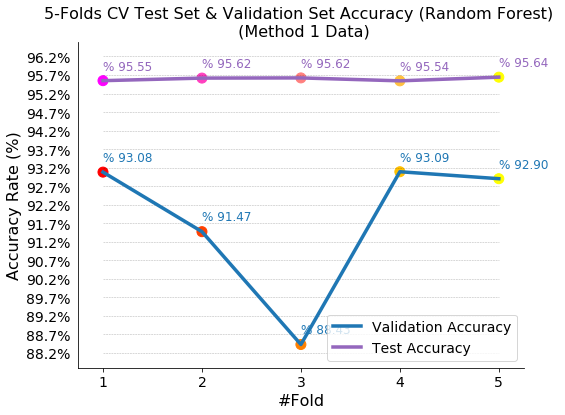

In [0]:
# plot Test Set Accuracy and Validation Set Accuracy
plt.figure(10, figsize=(8, 6))
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)    
# Ensure that the axis ticks only show up on the bottom and left of the plot.    
# Ticks on the right and top of the plot are generally unnecessary chartjunk.    
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left() 
# Make sure your axis ticks are large enough to be easily read.    
# You don't want your viewers squinting to read your plot.    
plt.yticks(np.arange(88.2, 96.5, 0.5), ["%.1f" %x + "%" 
                                           for x in np.arange(88.2, 96.5, 0.5)], 
           fontsize=14)  
x2 = np.arange(1,6,1)
plt.xticks(x2,fontsize=14)
for y in np.arange(88.2, 96.5, 0.5):
  x = np.arange(1, len(acc_rf)+1)
  plt.plot(x,[y]*len(x), "--", \
             lw=0.5, color="black", alpha=0.3) 
#Remove the tick marks; they are unnecessary with the tick lines we just plotted.    
plt.tick_params(axis="both", which="both", bottom="on", top="off",    
                labelbottom="on", left="off", right="off", labelleft="on")
val_y = [acc_rf[k]*100 for k in acc_rf.keys()]
plt.plot(x2, val_y,
         color=tableau20[0],lw=3.5, label="Validation Accuracy")
plt.scatter(x2, val_y, c=x2,
           cmap = plt.cm.autumn, s=100)

test_y = [tac_rf[k]*100 for k in tac_rf.keys()]
plt.plot(x2, test_y,
          color=tableau20[8],lw=3.5, label="Test Accuracy")
plt.scatter(x2, test_y, c=x2,
           cmap = plt.cm.spring, s=100)
for i, txt in enumerate(test_y):
    ax.annotate("%"+ " %.2f" %txt, (x2[i], txt+0.3), color=tableau20[8], 
                fontsize=12)
    ax.annotate("% " + "%.2f" %val_y[i],(x2[i], val_y[i]+0.3), 
                color=tableau20[0], fontsize=12)
plt.title("5-Folds CV Test Set & Validation Set Accuracy (Random Forest) \n (Method 1 Data)", 
          fontsize=16)
plt.xlabel("#Fold", fontsize=16)
plt.ylabel("Accuracy Rate (%)", fontsize=16)
ax.legend(loc="lower right", fontsize=14)
plt.show()

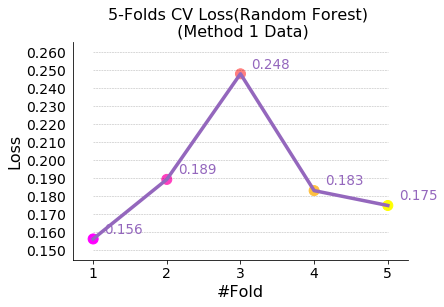

In [0]:
# Plot Loss
plt.figure(100, figsize=(6, 4))
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)    
# Ensure that the axis ticks only show up on the bottom and left of the plot.    
# Ticks on the right and top of the plot are generally unnecessary chartjunk.    
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left() 
# Make sure your axis ticks are large enough to be easily read.    
# You don't want your viewers squinting to read your plot.    
plt.yticks(np.arange(0.15, 0.26, 0.01), ["%.3f" %x 
                                           for x in np.arange(0.15, 0.26, 0.01)], 
           fontsize=14)  
x2 = np.arange(1,6,1)
plt.xticks(x2,fontsize=14)
for y in np.arange(0.15, 0.26, 0.01):
  x = np.arange(1, len(loss_rf)+1)
  plt.plot(x,[y]*len(x), "--", \
             lw=0.5, color="black", alpha=0.3) 
#Remove the tick marks; they are unnecessary with the tick lines we just plotted.    
plt.tick_params(axis="both", which="both", bottom="on", top="off",    
                labelbottom="on", left="off", right="off", labelleft="on")
y = [loss_rf[k] for k in loss_rf.keys()]
plt.plot(x2, y,
         color=tableau20[8],lw=3.5)
plt.scatter(x2, y, c=x2,
           cmap = plt.cm.spring, s=100)

for i, txt in enumerate(y):
    ax.annotate("%.3f" %txt, (x2[i]+0.15, txt+0.003), color=tableau20[8], 
                fontsize=13.5)
plt.title("5-Folds CV Loss(Random Forest) \n (Method 1 Data)", 
          fontsize=16)
plt.xlabel("#Fold", fontsize=16)
plt.ylabel("Loss", fontsize=16)
plt.show()

#### Method 2 Data:

In [0]:
clf_rf2 = ensemble.RandomForestClassifier(n_estimators=1000,
                                         criterion="entropy",
                                         max_depth=5, 
                                         min_samples_split=3,
                                         max_features='log2')
loss_rf2, acc_rf2, tac_rf2, model_rf2 = CVgeneric(clf_rf2, dat_list, 5, loss_func1, \
           train_val_idx=train_val_idx2, test_dat=[X_test2, y_test2])
rf_avg_tac2 = np.mean([tac_rf2[k] for k in tac_rf2.keys()])
rf_avg_ac2 = np.mean([acc_rf2[k] for k in acc_rf2.keys()])
print("Average K-fold CV Validation Accuracy(Random Forest): %", (rf_avg_ac2)*100)
print("Average Test Accuracy(Random Forest): %", (rf_avg_tac2)*100)

CV 1 mean loss:  0.1729195361572702
Accuracy for CV 1 : % 93.38086595799845
Test Accuracy for CV 1 : % 95.20747277506571
 
CV 2 mean loss:  0.1966673447271117
Accuracy for CV 2 : % 91.4018074735987
Test Accuracy for CV 2 : % 95.39992489673301
 
CV 3 mean loss:  0.20306302939661666
Accuracy for CV 3 : % 90.39462272333044
Test Accuracy for CV 3 : % 95.38584303417198
 
CV 4 mean loss:  0.21383308580890514
Accuracy for CV 4 : % 89.94378335188198
Test Accuracy for CV 4 : % 95.0619601952685
 
CV 5 mean loss:  0.14541831615612147
Accuracy for CV 5 : % 93.81376166702844
Test Accuracy for CV 5 : % 95.16053323319565
 
Average K-fold CV Validation Accuracy(Random Forest): % 91.7869682347676
Average Test Accuracy(Random Forest): % 95.24314682688697


In [0]:
# # save model
# import pickle
# for idx,m in enumerate(model_rf2):
#   filename = './models/rf_method2_mode%d.sav' %idx
#   pickle.dump(m, open(filename, 'wb'))

In [0]:
# # load the model from disk
model_rf2 = []
for i in range(5):
  filename = './models/rf_method2_mode%d.sav' %i
  model_rf2.append(pickle.load(open(filename, 'rb')))

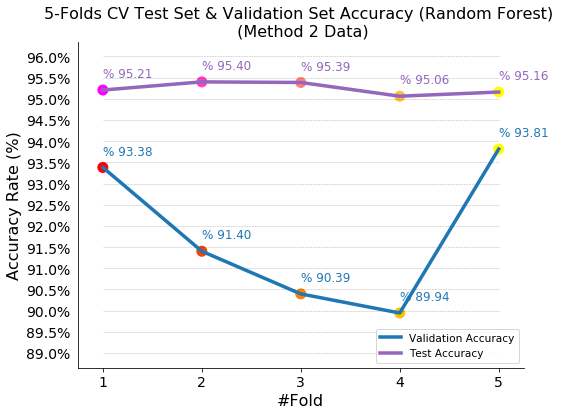

In [0]:
# plot Test Set Accuracy and Validation Set Accuracy
plt.figure(10, figsize=(8, 6))
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)    
# Ensure that the axis ticks only show up on the bottom and left of the plot.    
# Ticks on the right and top of the plot are generally unnecessary chartjunk.    
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left() 
# Make sure your axis ticks are large enough to be easily read.    
# You don't want your viewers squinting to read your plot.    
plt.yticks(np.arange(89.0, 96.1, 0.5), ["%.1f" %x + "%" 
                                           for x in np.arange(89.0, 96.1, 0.5)], 
           fontsize=14)  
x2 = np.arange(1,6,1)
plt.xticks(x2,fontsize=14)
for y in np.arange(89.0, 96.1, 0.5):
  x = np.arange(1, len(acc_rf)+1)
  plt.plot(x,[y]*len(x), "--", \
             lw=0.5, color="black", alpha=0.3) 
#Remove the tick marks; they are unnecessary with the tick lines we just plotted.    
plt.tick_params(axis="both", which="both", bottom="on", top="off",    
                labelbottom="on", left="off", right="off", labelleft="on")
val_y = [acc_rf2[k]*100 for k in acc_rf2.keys()]
plt.plot(x2, val_y,
         color=tableau20[0],lw=3.5, label="Validation Accuracy")
plt.scatter(x2, val_y, c=x2,
           cmap = plt.cm.autumn, s=100)

test_y = [tac_rf2[k]*100 for k in tac_rf2.keys()]
plt.plot(x2, test_y,
          color=tableau20[8],lw=3.5, label="Test Accuracy")
plt.scatter(x2, test_y, c=x2,
           cmap = plt.cm.spring, s=100)
for i, txt in enumerate(test_y):
    ax.annotate("%"+ " %.2f" %txt, (x2[i], txt+0.3), color=tableau20[8], 
                fontsize=12)
    ax.annotate("% " + "%.2f" %val_y[i],(x2[i], val_y[i]+0.3), 
                color=tableau20[0], fontsize=12)
plt.title("5-Folds CV Test Set & Validation Set Accuracy (Random Forest) \n (Method 2 Data)", 
          fontsize=16)
plt.xlabel("#Fold", fontsize=16)
plt.ylabel("Accuracy Rate (%)", fontsize=16)
ax.legend(loc="lower right", fontsize=10.5)
plt.show()

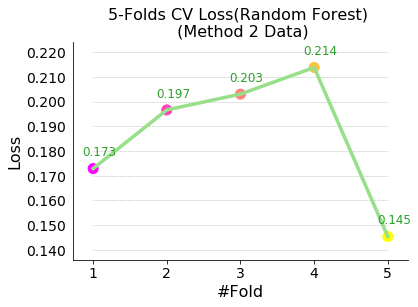

In [0]:
# Plot Loss
plt.figure(100, figsize=(6, 4))
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)    
# Ensure that the axis ticks only show up on the bottom and left of the plot.    
# Ticks on the right and top of the plot are generally unnecessary chartjunk.    
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left() 
# Make sure your axis ticks are large enough to be easily read.    
# You don't want your viewers squinting to read your plot.    
plt.yticks(np.arange(0.140, 0.221, 0.01), ["%.3f" %x 
                                           for x in np.arange(0.14, 0.221, 0.01)], 
           fontsize=14)  
x2 = np.arange(1,6,1)
plt.xticks(x2,fontsize=14)
for y in np.arange(0.14, 0.221, 0.01):
  x = np.arange(1, len(loss_rf)+1)
  plt.plot(x,[y]*len(x), "--", \
             lw=0.5, color="black", alpha=0.3) 
#Remove the tick marks; they are unnecessary with the tick lines we just plotted.    
plt.tick_params(axis="both", which="both", bottom="on", top="off",    
                labelbottom="on", left="off", right="off", labelleft="on")
y = [loss_rf2[k] for k in loss_rf.keys()]
plt.plot(x2, y,
         color=tableau20[5],lw=3.5)
plt.scatter(x2, y, c=x2,
           cmap = plt.cm.spring, s=100)

for i, txt in enumerate(y):
    ax.annotate("%.3f" %txt, (x2[i]-0.15, txt+0.005), color=tableau20[4], 
                fontsize=12)
plt.title("5-Folds CV Loss(Random Forest) \n (Method 2 Data)", 
          fontsize=16)
plt.xlabel("#Fold", fontsize=16)
plt.ylabel("Loss", fontsize=16)
plt.show()

#### Calc ROC

In [0]:
#best_idx_rf2 = eval(max(tac_rf2, key=tac_rf2.get)[2]) - 1
#calc ROC
model=model_rf2[4]#best_idx_rf2]
fpr_rf2, tpr_rf2, thre_rf2 = metrics.roc_curve(y_test2, model.predict_proba(X_test2[features])[:, 1])
roc_auc_rf2 = metrics.auc(fpr_rf2, tpr_rf2)

## Plot ROC

 In some cases, True Positive Rate is more important than False Positive, for example when a disease is highly infectious or associated with serious complications. On the other hand, in certain circumstances, False Positive may be preferred over True Positive, say when the subsequent diagnostic testing is risky or costly. If there is no preference between True Positive Rate and False Positive Rate, nonetheless, a reasonable approach would be to maximize both indices.
 
 there is a cut-off value where the test Se is equivalent to the test Sp. One of the frequently used criterion for determination of the test cut-off value is the one corresponding to this particular point, where Se = Sp. This point is mathematically the intersection of the line connecting the left-upper corner and the right-lower corner of the unit square (the line Se = Sp), and the ROC curve (Figure 1). This point of the curve is where the product of these two indices (Se x Sp) is maximum – the area of the shaded rectangle in Figure 1 is maximum when its sides (Se and Sp) are equal, a square.

#### Calculate Cutoff Point

In [0]:
"""
Function for calculating the intersection of two line using Cramer's Rule
Input:
      suppose ax + by = c
      L1: line 1 in the form of [coeff of x1, coeff of y1, intercept]
      L1: line 1 in the form of [coeff of x2, coeff of y2, intercept] 
Output: 
      X coordinate of the intersection between L1 and L2
      Y coordinate of the intersection between L1 and L2
   or 
      False if L1 and L2 don't have intersection"""
  """
Input:
  p1: point 1, a list in the form of [x_coordinate, y_coordinate]
  p2: point 2, a list in the form of [x_coordinate, y_coordinate]
  
Output:
  suppose ax + by = c
  A: Coefficient of x in the equation (a)
  B: Coefficient of y in the equation (b)
  C: the intercept the line (c)"""

In [0]:
def line(p1, p2):
  A = (p1[1] - p2[1])
  B = (p2[0] - p1[0])
  C = (p1[0]*p2[1] - p2[0]*p1[1])
  return A, B, -C

def intersection(L1, L2):
  D  = L1[0] * L2[1] - L1[1] * L2[0]
  Dx = L1[2] * L2[1] - L1[1] * L2[2]
  Dy = L1[0] * L2[2] - L1[2] * L2[0]
  if D != 0:
    x = Dx / D
    y = Dy / D
    return x,y
  else:
    return False

In [0]:
fpr_list = [fpr_lr,fpr_qda,fpr_knn,fpr_rf]
tpr_list= [tpr_lr, tpr_qda,tpr_knn,tpr_rf]
auc_list= [roc_auc_lr, roc_auc_qda, roc_auc_knn, roc_auc_rf]

In [0]:
# cutoff = []
# TPFP = line([0,1],[0.5,0.5])
# rf = line([fpr_rf[0], tpr_rf[0]], [fpr_rf[1], tpr_rf[1]])
# cutoff.append(intersection(TPFP, rf))

# for idx, fpr in enumerate(fpr_list[:len(fpr_list) - 1]):
#   l2 = line([fpr[1], tpr_list[idx][1]], [fpr[2], tpr_list[idx][2]])
#   cutoff.append(intersection(TPFP, l2))

In [0]:
cutoff = []
for idx,f in enumerate(fpr_list):
  l = len(f) // 2
  cutoff.append([ f[l],tpr_list[idx][l]])

### Method 1 Data

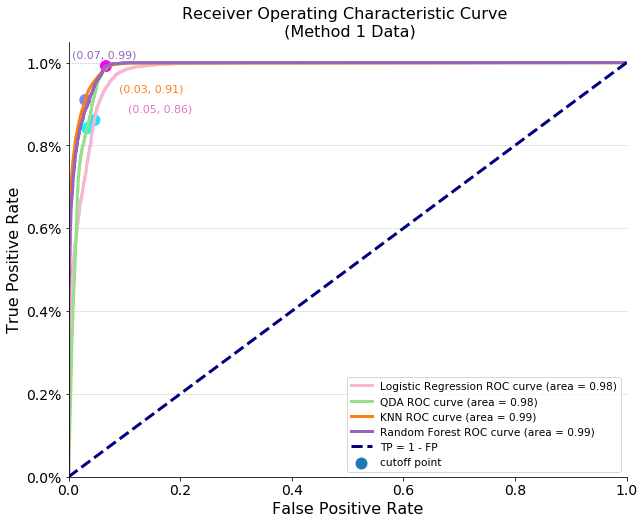

In [187]:
# plot ROC Curve for All Methods (Logistic Regression, QDA, KNN, Random Forest)
plt.figure(10, figsize=(10, 8))
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)       
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left() 
   
plt.yticks(np.arange(0, 1.1, 0.2), ["%.1f" %x + "%" 
                                           for x in np.arange(0, 1.1, 0.2)], 
           fontsize=14)  
x2 = np.arange(0,1.1,0.2)
plt.xticks(x2,fontsize=14)
for y in np.arange(0, 1.1, 0.2):
  plt.plot(x2,[y]*len(x2), "--", \
             lw=0.5, color="black", alpha=0.3) 
# #Remove the tick marks; they are unnecessary with the tick lines we just plotted.    
# plt.tick_params(axis="both", which="both", bottom="on", top="off",    
#                 labelbottom="on", left="off", right="off", labelleft="on")
method=["Logistic Regression", "QDA", "KNN", "Random Forest"]
i_l = [13,5,2,8]
i_l2 = [12,4,2,8]
for idx, fpr in enumerate(fpr_list):
  plt.plot(fpr, tpr_list[idx], color=tableau20[i_l[idx]],
           lw=3, label=str(method[idx]) + ' ROC curve (area = %0.2f)' % auc_list[idx])

x_c = [c[0] for c in cutoff]
y_c = [c[1] for c in cutoff]
plt.scatter(x_c, y_c, c=y_c, cmap = plt.cm.cool, s=120, label='cutoff point')
#   plt.plot(cutoff_l[idx], cutoff_l[idx], marker='o', markersize=5, 
#            color=tableau20[i_l2[idx]])

plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--', label="TP = 1 - FP")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
# plt.plot([0,0.5],[1,0.5], color=tableau20[1], lw=1.5, linestyle='--', 
#          label="TP = FP")

for i, txt in enumerate(y_c):
    ax.annotate( "(%.2f, %.2f)" %(x_c[i],txt), (x_c[i]+math.pow(-1,i)*0.06, txt+0.02), 
                color=tableau20[i_l2[i]], 
                fontsize=11, label="cutoff point coordinates")


    
plt.title("Receiver Operating Characteristic Curve \n (Method 1 Data)", 
          fontsize=16)
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
ax.legend(loc="best", fontsize=10.5)
plt.show()

#### Method 2 Data:

In [0]:
fpr_list2 = [fpr2,fpr_qda2,fpr_knn2,fpr_rf2]
tpr_list2= [tpr2, tpr_qda2,tpr_knn2,tpr_rf2]
auc_list2= [roc_auc_lr2, roc_auc_qda2, roc_auc_knn2, roc_auc_rf2]
# cutoff2 = []
# rf2 = line([fpr_rf2[0], tpr_rf2[0]], [fpr_rf2[1], tpr_rf2[1]])
# cutoff2.append(intersection(TPFP, rf2))

# for idx, fpr in enumerate(fpr_list2[:len(fpr_list2) - 1]):
#   l2 = line([fpr[1], tpr_list2[idx][1]], [fpr[2], tpr_list2[idx][2]])
#   cutoff2.append(intersection(TPFP, l2))

In [0]:
cutoff2 = []
for idx,f in enumerate(fpr_list2):
  l = len(f) // 2
  cutoff2.append([f[l],tpr_list2[idx][l]])

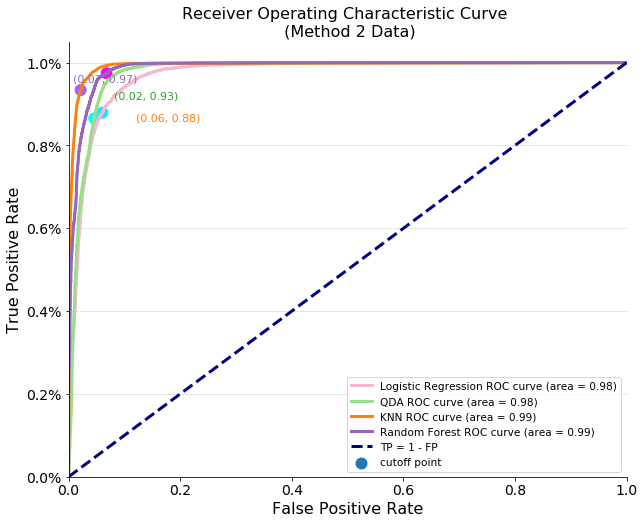

In [190]:
# plot ROC Curve for All Methods (Logistic Regression, QDA, KNN, Random Forest)
plt.figure(10, figsize=(10, 8))
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)       
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left() 
   
plt.yticks(np.arange(0, 1.1, 0.2), ["%.1f" %x + "%" 
                                           for x in np.arange(0, 1.1, 0.2)], 
           fontsize=14)  
x2 = np.arange(0,1.1,0.2)
plt.xticks(x2,fontsize=14)
for y in np.arange(0, 1.1, 0.2):
  plt.plot(x2,[y]*len(x2), "--", \
             lw=0.5, color="black", alpha=0.3) 
# #Remove the tick marks; they are unnecessary with the tick lines we just plotted.    
# plt.tick_params(axis="both", which="both", bottom="on", top="off",    
#                 labelbottom="on", left="off", right="off", labelleft="on")
method=["Logistic Regression", "QDA", "KNN", "Random Forest"]
i_l = [13,5,2,8]
i_l2 = [2,12,4,8]
for idx, fpr in enumerate(fpr_list2):
  plt.plot(fpr, tpr_list2[idx], color=tableau20[i_l[idx]],
           lw=3, label=str(method[idx]) + ' ROC curve (area = %0.2f)' % auc_list[idx])

x_c = [c[0] for c in cutoff2]
y_c = [c[1] for c in cutoff2]
plt.scatter(x_c, y_c, c=y_c, cmap = plt.cm.cool, s=120, label='cutoff point')
#   plt.plot(cutoff_l[idx], cutoff_l[idx], marker='o', markersize=5, 
#            color=tableau20[i_l2[idx]])

plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--', label="TP = 1 - FP")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
# plt.plot([0,0.5],[1,0.5], color=tableau20[1], lw=1.5, linestyle='--', 
#          label="TP = FP")


for i, txt in enumerate(y_c):
    ax.annotate( "(%.2f, %.2f)" %(x_c[i],txt), (x_c[i]+math.pow(-1,i)*0.06, 
                                                txt-0.02),
                color=tableau20[i_l2[i]], 
                fontsize=11, label="cutoff point coordinates")

    
plt.title("Receiver Operating Characteristic Curve \n (Method 2 Data)", 
          fontsize=16)
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
ax.legend(loc="best", fontsize=10.5)
plt.show()

#### (c) (Bonus) Assess the fit using other relevant metrics.
Do whatever you think is helpful to compare algorithms and understand their performance. 
There is no unique answer. 
Some points will be given if you do something. 
More points are given if we think your metric really helps compare algorithms in a better way. 

### Confusion Matrix

In [0]:
from sklearn.metrics import confusion_matrix 
from sklearn.utils.multiclass import unique_labels

In [0]:
def plot_confusion_matrix(y_true, y_pred, labels,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Input:
        y_true: list, the true label of the test set 
        y_pred: list, the predicted label of the test set 
        labels: list of string, the name for your labels
        normalize: boolean, whether you want a normalized confusion matrix,
                   default is False
        cmap: the color of your confusion matrix plot 
    
    Output:
        the figure of your plot
        (Reminder: After you have called this fuction, you have called 
        plt.show() to show the plot)
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#         print("Normalized confusion matrix")
#     else:
#         print('Confusion matrix, without normalization')

#     print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=labels, yticklabels=labels,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

### Method 1

Logistic Regression

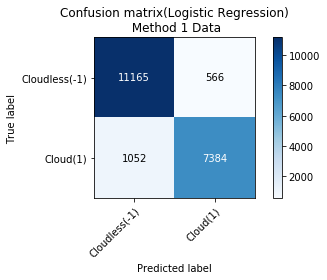

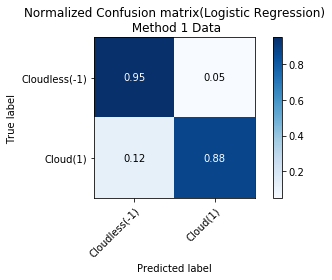

In [0]:
np.set_printoptions(precision=2)

model=model_list1[best_idx_lr]
lab_names = ["Cloudless(-1)", "Cloud(1)"]
y_pred = model.predict(X_test[features])
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test.values, y_pred, labels=lab_names,
                      title='Confusion matrix(Logistic Regression)\n Method 1 Data')
plt.show()

# Plot normalized confusion matrix
plot_confusion_matrix(y_test.values, y_pred, labels=lab_names, normalize=True,
                      title='Normalized Confusion matrix(Logistic Regression)\n Method 1 Data')

plt.show()

QDA 

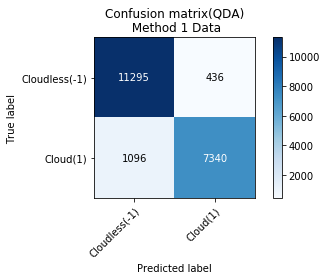

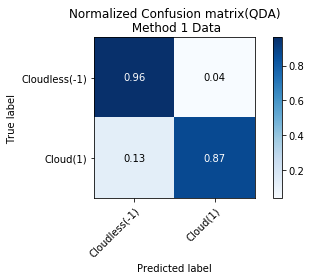

In [0]:
#method1 data 
np.set_printoptions(precision=2)

model=model_qda2[best_idx_qda2]
lab_names = ["Cloudless(-1)", "Cloud(1)"]
y_pred = model.predict(X_test[features])
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test.values, y_pred, labels=lab_names,
                      title='Confusion matrix(QDA)\n Method 1 Data')
plt.show()

# Plot normalized confusion matrix
plot_confusion_matrix(y_test.values, y_pred, labels=lab_names, normalize=True,
                      title='Normalized Confusion matrix(QDA)\n Method 1 Data')

plt.show()

KNN

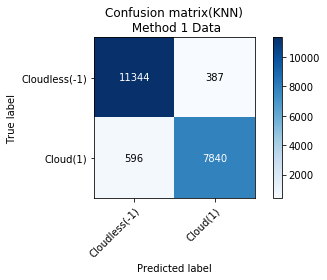

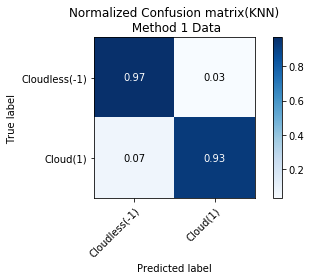

In [0]:
#method 1 data 
np.set_printoptions(precision=2)

model=models_knn[2][best_idx_knn]
lab_names = ["Cloudless(-1)", "Cloud(1)"]
y_pred = model.predict(X_test[features])
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test.values, y_pred, labels=lab_names,
                      title='Confusion matrix(KNN)\n Method 1 Data')
plt.show()

# Plot normalized confusion matrix
plot_confusion_matrix(y_test.values, y_pred, labels=lab_names, normalize=True,
                      title='Normalized Confusion matrix(KNN)\n Method 1 Data')

plt.show()

Random Forest

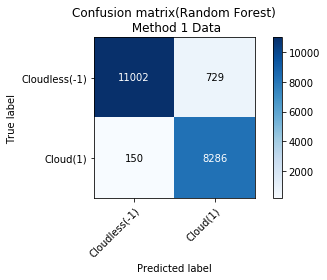

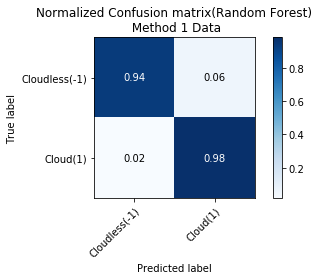

In [0]:
# method 1 data 
np.set_printoptions(precision=2)

model=model_rf[best_idx_rf]
lab_names = ["Cloudless(-1)", "Cloud(1)"]
y_pred = model.predict(X_test[features])
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test.values, y_pred, labels=lab_names,
                      title='Confusion matrix(Random Forest)\n Method 1 Data')
plt.show()

# Plot normalized confusion matrix
plot_confusion_matrix(y_test.values, y_pred, labels=lab_names, normalize=True,
                      title='Normalized Confusion matrix(Random Forest)\n Method 1 Data')

plt.show()

### Method 2

Logistic Regression 

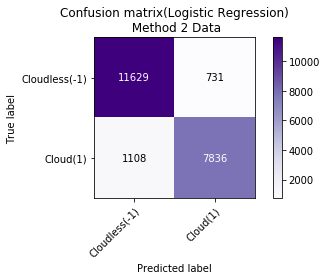

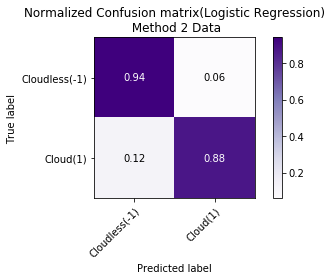

In [0]:
np.set_printoptions(precision=2)

model=model_list2[best_idx_lr2]
lab_names = ["Cloudless(-1)", "Cloud(1)"]
y_pred = model.predict(X_test2[features])
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test2, y_pred, labels=lab_names,
                      title='Confusion matrix(Logistic Regression)\n Method 2 Data',
                     cmap=plt.cm.Purples)
plt.show()

# Plot normalized confusion matrix
plot_confusion_matrix(y_test2, y_pred, labels=lab_names, normalize=True,
                      title='Normalized Confusion matrix(Logistic Regression)\n Method 2 Data',
                     cmap=plt.cm.Purples)

plt.show()

QDA

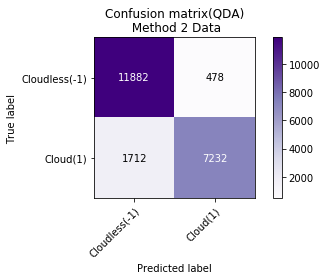

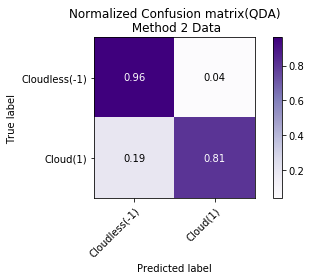

In [0]:
# method 2 data
np.set_printoptions(precision=2)

model=model_qda2[best_idx_qda2]
lab_names = ["Cloudless(-1)", "Cloud(1)"]
y_pred = model.predict(X_test2[features])
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test2.values, y_pred, labels=lab_names,
                      title='Confusion matrix(QDA)\n Method 2 Data',
                     cmap=plt.cm.Purples)
plt.show()

# Plot normalized confusion matrix
plot_confusion_matrix(y_test2.values, y_pred, labels=lab_names, normalize=True,
                      title='Normalized Confusion matrix(QDA)\n Method 2 Data',
                     cmap=plt.cm.Purples)

plt.show()

KNN

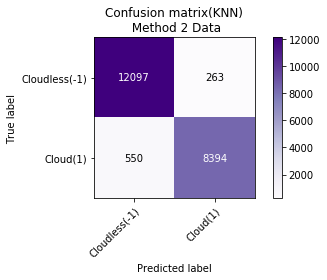

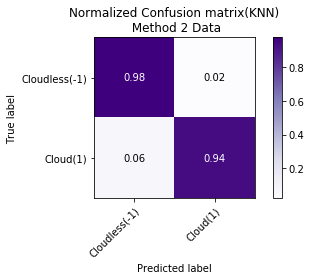

In [0]:
np.set_printoptions(precision=2)

model=models_knn2[2][best_idx_knn2]
lab_names = ["Cloudless(-1)", "Cloud(1)"]
y_pred = model.predict(X_test2[features])
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test2.values, y_pred, labels=lab_names,
                      title='Confusion matrix(KNN)\n Method 2 Data',
                     cmap=plt.cm.Purples)
plt.show()

# Plot normalized confusion matrix
plot_confusion_matrix(y_test2.values, y_pred, labels=lab_names, normalize=True,
                      title='Normalized Confusion matrix(KNN)\n Method 2 Data',
                     cmap=plt.cm.Purples)

plt.show()

Random Forest 

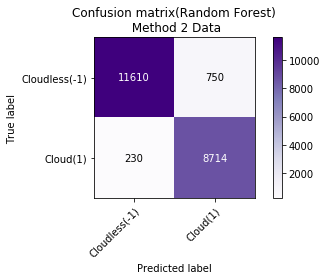

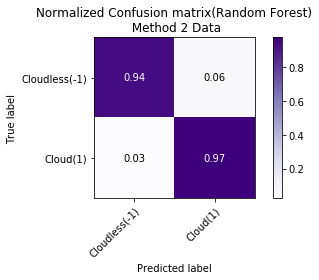

In [0]:
np.set_printoptions(precision=2)

model=model_rf2[best_idx_rf2]
lab_names = ["Cloudless(-1)", "Cloud(1)"]
y_pred = model.predict(X_test2[features])
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test2.values, y_pred, labels=lab_names,
                      title='Confusion matrix(Random Forest)\n Method 2 Data',
                      cmap=plt.cm.Purples)
plt.show()

# Plot normalized confusion matrix
plot_confusion_matrix(y_test2.values, y_pred, labels=lab_names, normalize=True,
                      title='Normalized Confusion matrix(Random Forest)\n Method 2 Data',
                     cmap=plt.cm.Purples)

plt.show()

# Problem 4
###(a) Do an in-depth analysis of a good classication model of your choice by showing some
diagnostic plots or information related to convergence or parameter estimation.

#### Method 1 Data:

In [0]:
# bootstrap to test the stability of the parameter in logistic regression
def bootstrap(dat, train_val_idx, per,nums=1000):
  """Input: 
      dat: data to train on
      train_val_idx: the index list of all the data chunks excluding data
          chunks in the test set 
      per: percentage of the data to used for bootstrapping
      nums: number of times for bootstrapping, default is 1000 times
   Output:
      coeff_list: the list of lists of 8 coefficients for 8 training features 
      respectively using logistic regression"""
  if per > 1:
    per = per // 100
  coeff_list = []
  workers = mp.Pool()
  for i in range(nums):
#     print(i)
    num_examples = len(train_val_idx) # for choosing from train_val_idx 
    idx = np.random.permutation(num_examples)
    chunk_size = int(num_examples * per) #each data chunk's size
    cur_idx = train_val_idx[idx][:chunk_size]
    cur_x = [dat[i][features] for i in cur_idx] 
    cur_y = [dat[i]["expert label"] for i in cur_idx]
    X, Y = pd.DataFrame(), pd.DataFrame()
    for x in cur_x:
      X = pd.concat([X, x], axis=0)
    for y in cur_y:
      Y = pd.concat([Y, y], axis=0)
    clf = linear_model.LogisticRegression(solver = 'lbfgs', 
                                          multi_class='multinomial')
    w = workers.apply_async(clf.fit, args=(X.values, \
                                           Y.values.reshape(-1,)))
    model = w.get()
    coeff_list.append(model.coef_)
  workers.close()
  return coeff_list

In [0]:
coeff_list1 = bootstrap(dat_cor, train_val_idx, 0.25)
f1,f2,f3,f4,f5,f6,f7,f8=[],[],[],[],[],[],[],[]
for c in coeff_list1:
  c = np.array(c).flatten()
  f1.append(c[0])
  f2.append(c[1])
  f3.append(c[2])
  f4.append(c[3])
  f5.append(c[4])
  f6.append(c[5])
  f7.append(c[6])
  f8.append(c[7])

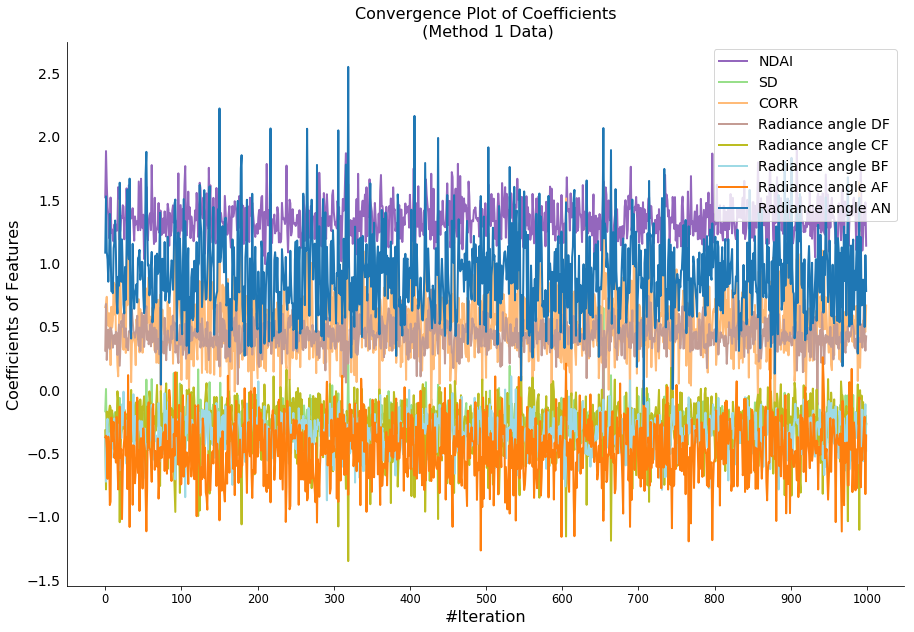

In [0]:
# Plot Convergence
plt.figure(22, figsize=(15, 10))
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)    
# Ensure that the axis ticks only show up on the bottom and left of the plot.    
# Ticks on the right and top of the plot are generally unnecessary chartjunk.    
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()     
# plt.yticks(np.arange(90.3,96, 0.5), ["%.1f" %x 
#                                            for x in np.arange(90.3,96, 0.5)], 
#            fontsize=14)  
x2 = np.arange(0,1001,100)
plt.xticks(x2, fontsize=11.5)
# for y in np.arange(90.3,96, 0.5):
#   x = np.arange(len(feature_tac)+1)
#   plt.plot(x,[y]*len(x), "--", \
#              lw=0.5, color="black", alpha=0.3) 
#Remove the tick marks; they are unnecessary with the tick lines we just plotted.    
plt.tick_params(axis="both", which="both", bottom="on", top="off",    
                labelbottom="on", left="off", right="off", labelleft="on")
f_coef = [f1,f2,f3,f4,f5,f6,f7,f8]
i_l = []
for idx,f in enumerate(f_coef):
  i = random.randint(0,19)
  while i in i_l:
    i = random.randint(0,19)
  i_l.append(i)
  plt.plot(range(len(f1)), f, c=tableau20[i], lw=2, label=features[idx])

# for i, txt in enumerate(y):
#     ax.annotate("% " + "%.2f" %txt, (x2[i], txt+0.05), color=tableau20[4], 
#                 fontsize=12)
plt.title("Convergence Plot of Coefficients\n (Method 1 Data)", 
          fontsize=16)
plt.xlabel("#Iteration", fontsize=16)
plt.ylabel("Coefficients of Features", fontsize=16)
plt.legend(loc='best')
plt.show()

#### Method 2 Data:

In [0]:
coeff_list2 = bootstrap(dat_list, train_val_idx2, 0.25)
ff1,ff2,ff3,ff4,ff5,ff6,ff7,ff8=[],[],[],[],[],[],[],[]
for c in coeff_list2:
  c = np.array(c).flatten()
  ff1.append(c[0])
  ff2.append(c[1])
  ff3.append(c[2])
  ff4.append(c[3])
  ff5.append(c[4])
  ff6.append(c[5])
  ff7.append(c[6])
  ff8.append(c[7])

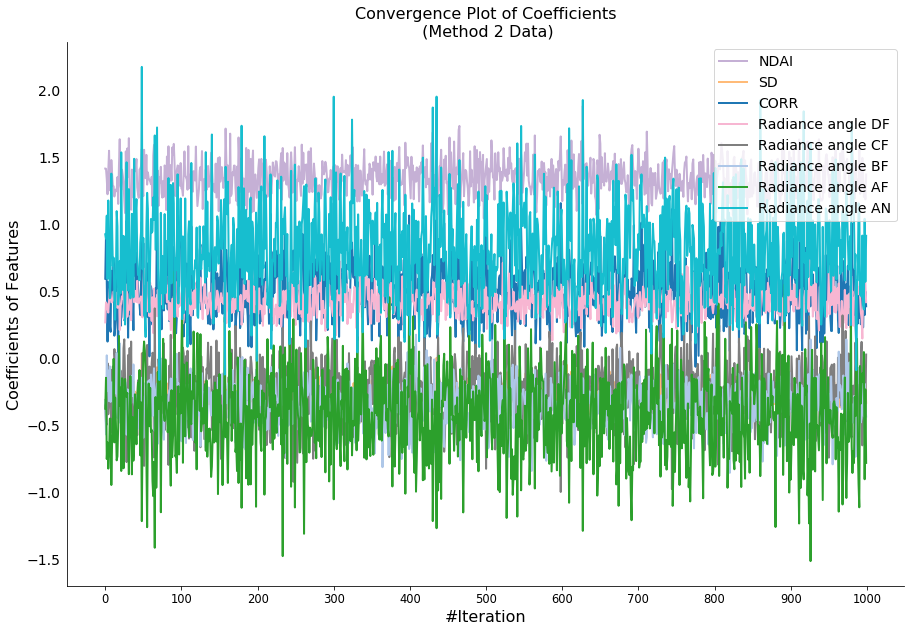

In [0]:
# Plot convergence plot 
# Plot Convergence
plt.figure(22, figsize=(15, 10))
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)    
# Ensure that the axis ticks only show up on the bottom and left of the plot.    
# Ticks on the right and top of the plot are generally unnecessary chartjunk.    
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()     
# plt.yticks(np.arange(90.3,96, 0.5), ["%.1f" %x 
#                                            for x in np.arange(90.3,96, 0.5)], 
#            fontsize=14)  
x2 = np.arange(0,1001,100)
plt.xticks(x2, fontsize=11.5)
# for y in np.arange(90.3,96, 0.5):
#   x = np.arange(len(feature_tac)+1)
#   plt.plot(x,[y]*len(x), "--", \
#              lw=0.5, color="black", alpha=0.3) 
#Remove the tick marks; they are unnecessary with the tick lines we just plotted.    
plt.tick_params(axis="both", which="both", bottom="on", top="off",    
                labelbottom="on", left="off", right="off", labelleft="on")
ff_coef = [ff1,ff2,ff3,ff4,ff5,ff6,ff7,ff8]
i_l = []
for idx,f in enumerate(ff_coef):
  i = random.randint(0,19)
  while i in i_l:
    i = random.randint(0,19)
  i_l.append(i)
  plt.plot(range(len(ff1)), f, c=tableau20[i], lw=2, label=features[idx])

# for i, txt in enumerate(y):
#     ax.annotate("% " + "%.2f" %txt, (x2[i], txt+0.05), color=tableau20[4], 
#                 fontsize=12)
plt.title("Convergence Plot of Coefficients\n (Method 2 Data)", 
          fontsize=16)
plt.xlabel("#Iteration", fontsize=16)
plt.ylabel("Coefficients of Features", fontsize=16)
plt.legend(loc="upper right")
plt.show()

### (b) For your best classiffication model(s), do you notice any patterns in the misclassfication
errors? Again, use quantitative and visual methods of analysis. Do you notice problems
in particular regions, or in specic ranges of feature values?

TSNE is a tool to visualize high-dimensional data. It converts similarities between data points to joint probabilities and tries to minimize the Kullback-Leibler divergence between the joint probabilities of the low-dimensional embedding and the high-dimensional data. t-SNE has a cost function that is not convex, i.e. with different initializations we can get different results.

### Method 1

In [0]:
# find out all the misclassified data
model=model_rf[best_idx_rf]
y_pred = model.predict(X_test[features])
error_idx = []
cloud_e = []
noc_e = []
for i in range(len(y_test)):
  if(y_test.iloc[i] != y_pred[i]):
    error_idx.append(i)
    if(y_test.iloc[i] == -1):
      noc_e.append(i)
    else:
      cloud_e.append(i)

In [0]:
la = y_test.iloc[error_idx]
error_dat = pd.concat([la, X_test.iloc[error_idx,:]],axis=1)
cloud_error = X_test.iloc[cloud_e,:]
nocloud_error = X_test.iloc[noc_e,:]

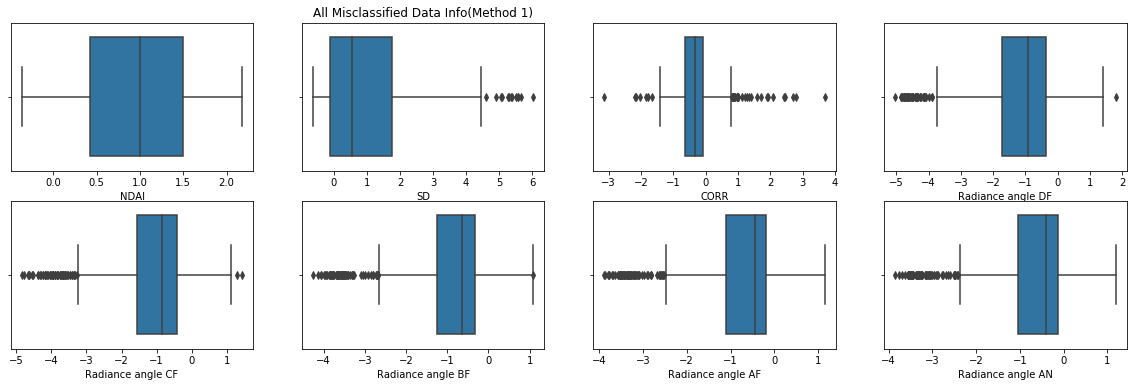

In [0]:
#error data range box plot
fig, ((ax1, ax2, ax3,ax4),(ax5,ax6,ax7,ax8)) = plt.subplots(2, 4, figsize=(20,6))
dd=error_dat
sns.boxplot(dd['NDAI'],ax=ax1)
sns.boxplot(dd['SD'],ax=ax2).set_title("All Misclassified Data Info(Method 1)")
sns.boxplot(dd['CORR'],ax=ax3)
sns.boxplot(dd['Radiance angle DF'],ax=ax4)
sns.boxplot(dd['Radiance angle CF'],ax=ax5)
sns.boxplot(dd['Radiance angle BF'],ax=ax6)
sns.boxplot(dd['Radiance angle AF'],ax=ax7)
sns.boxplot(dd['Radiance angle AN'],ax=ax8)


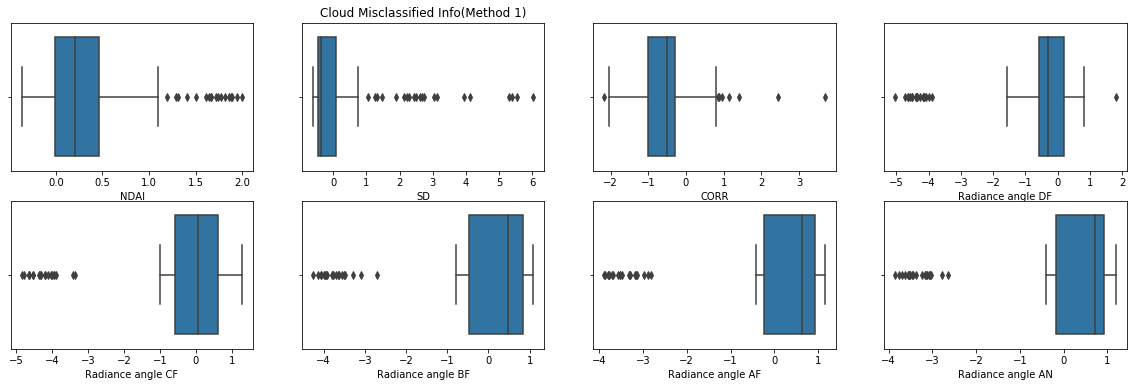

In [0]:
# Cloud data misclassified as cloudless 
fig, ((ax1, ax2, ax3,ax4),(ax5,ax6,ax7,ax8)) = plt.subplots(2, 4, figsize=(20,6))
dd=cloud_error
sns.boxplot(dd['NDAI'],ax=ax1)
sns.boxplot(dd['SD'],ax=ax2).set_title("Cloud Misclassified Info(Method 1)")
sns.boxplot(dd['CORR'],ax=ax3)
sns.boxplot(dd['Radiance angle DF'],ax=ax4)
sns.boxplot(dd['Radiance angle CF'],ax=ax5)
sns.boxplot(dd['Radiance angle BF'],ax=ax6)
sns.boxplot(dd['Radiance angle AF'],ax=ax7)
sns.boxplot(dd['Radiance angle AN'],ax=ax8)

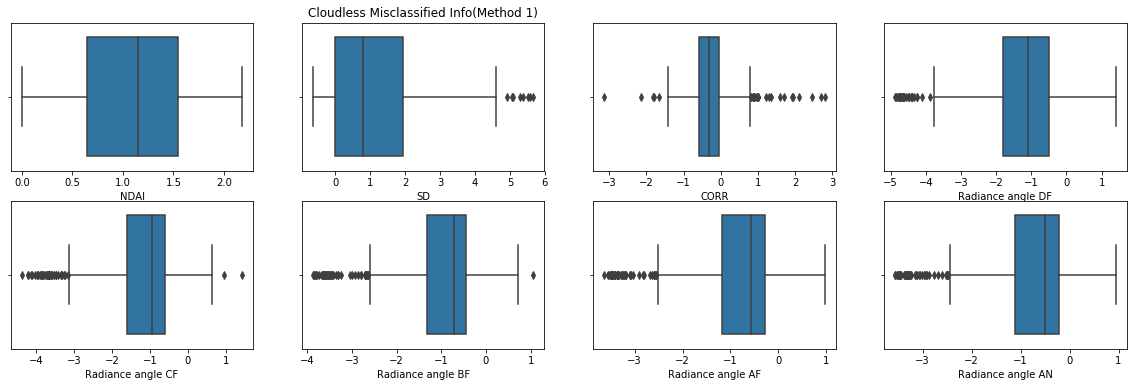

In [0]:
# Cloudless data misclassified as cloud
fig, ((ax1, ax2, ax3,ax4),(ax5,ax6,ax7,ax8)) = plt.subplots(2, 4, figsize=(20,6))
dd=nocloud_error
sns.boxplot(dd['NDAI'],ax=ax1)
sns.boxplot(dd['SD'],ax=ax2).set_title("Cloudless Misclassified Info(Method 1)")
sns.boxplot(dd['CORR'],ax=ax3)
sns.boxplot(dd['Radiance angle DF'],ax=ax4)
sns.boxplot(dd['Radiance angle CF'],ax=ax5)
sns.boxplot(dd['Radiance angle BF'],ax=ax6)
sns.boxplot(dd['Radiance angle AF'],ax=ax7)
sns.boxplot(dd['Radiance angle AN'],ax=ax8)

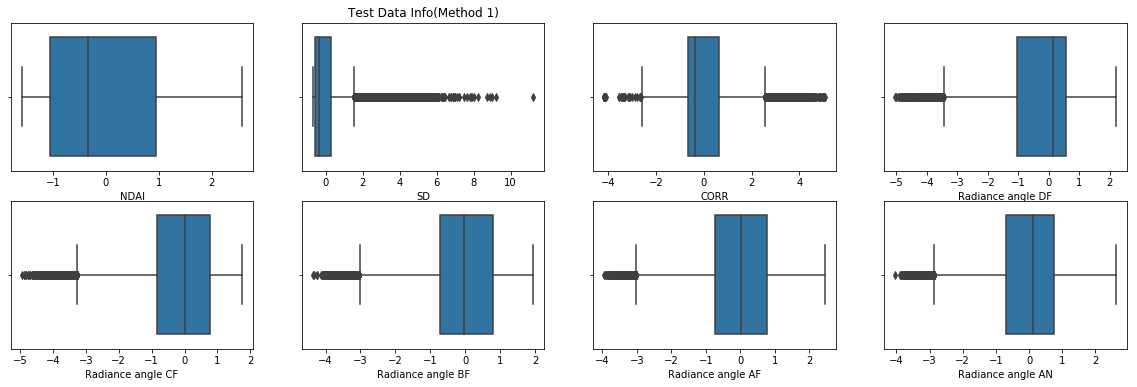

In [0]:
# X_test 
fig, ((ax1, ax2, ax3,ax4),(ax5,ax6,ax7,ax8)) = plt.subplots(2, 4, figsize=(20,6))
dd=X_test
sns.boxplot(dd['NDAI'],ax=ax1)
sns.boxplot(dd['SD'],ax=ax2).set_title("Test Data Info(Method 1)")
sns.boxplot(dd['CORR'],ax=ax3)
sns.boxplot(dd['Radiance angle DF'],ax=ax4)
sns.boxplot(dd['Radiance angle CF'],ax=ax5)
sns.boxplot(dd['Radiance angle BF'],ax=ax6)
sns.boxplot(dd['Radiance angle AF'],ax=ax7)
sns.boxplot(dd['Radiance angle AN'],ax=ax8)

In [0]:
# from matplotlib.colors import ListedColormap
# from sklearn import neighbors, datasets
# h = .02  # step size in the mesh

# # Create color maps
# cmap_light = ListedColormap(['#f3a6fc', '#aeedf9'])
# cmap_bold = ListedColormap(['#e8149e', '#1e0bea'])

# # Plot the decision boundary. For that, we will assign a color to each
# # point in the mesh [x_min, x_max]x[y_min, y_max].
# min_l = []
# max_l = []
# for idx, f in enumerate(features):
#   min_l.append(X_des[f]['min'] - 0.01)
#   max_l.append(X_des[f]['max'] + 0.01)
  
# # x_min, x_max = X_des[features[0]]['min'] - 1, X_des[features[0]]['max']  + 1
# # y_min, y_max = X_des[features[1]]['min']  - 1, X_des[features[1]]['max'] + 1

# x1,x2,x3 = np.meshgrid(np.arange(min_l[0], max_l[0], h),
#                        np.arange(min_l[1], max_l[1], h),
#                                       np.arange(min_l[2], max_l[2], h),
#                                      np.arange(min_l[3], max_l[3], h))

# clf = neighbors.KNeighborsClassifier(35)
# clf.fit(X_train[features[:3]], y_train_val)
# Z = clf.predict(np.c_[x1.ravel(), x2.ravel(),
#                        x3.ravel()])

# # Put the result into a color plot
# Z = Z.reshape(x1.shape)
# plt.figure()
# plt.pcolormesh(x1,x2,x3, Z, cmap=cmap_light)

# # Plot also the training points
# plt.scatter(X_train[features], Y_train, c=Y_train, cmap=cmap_bold)
# plt.xlim(xx.min(), xx.max())
# plt.ylim(yy.min(), yy.max())
# plt.title("2-Class classification (k = %i) \n Method 1 Data"
#           % 35)

# plt.show()

#### Method 2 Data:

In [0]:
# find out the misclassified data
model=model_rf2[best_idx_rf]
y_pred2 = model.predict(X_test2[features])
error_idx2 = []
cloud_e2 = []
noc_e2 = []
for i in range(len(y_test2)):
  if(y_test2.iloc[i] != y_pred2[i]):
    error_idx2.append(i)
    if(y_test2.iloc[i] == -1):
      noc_e2.append(i)
    else:
      cloud_e2.append(i)

In [0]:
la = y_test2.iloc[error_idx2]
error_dat2 = pd.concat([la, X_test2.iloc[error_idx2,:]],axis=1)
cloud_error2 = X_test2.iloc[cloud_e2,:]
nocloud_error2 = X_test2.iloc[noc_e2,:]

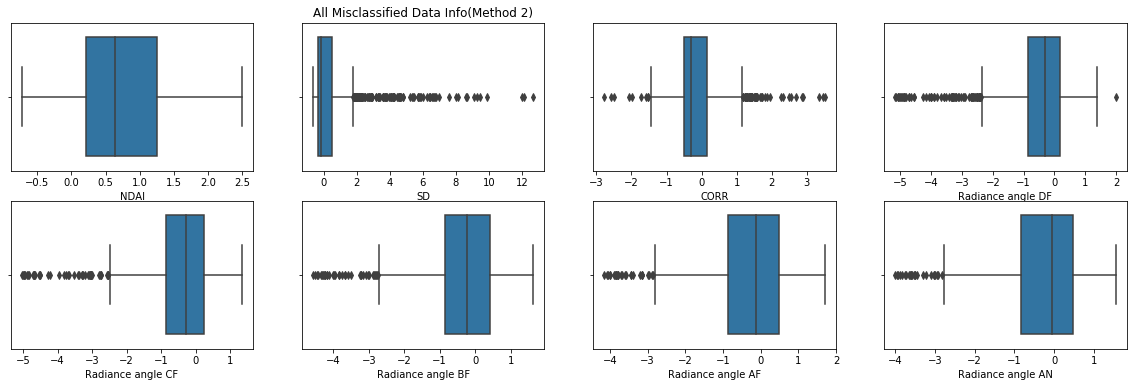

In [0]:
#error data range box plot
fig, ((ax1, ax2, ax3,ax4),(ax5,ax6,ax7,ax8)) = plt.subplots(2, 4, figsize=(20,6))
dd=error_dat2
sns.boxplot(dd['NDAI'],ax=ax1)
sns.boxplot(dd['SD'],ax=ax2).set_title("All Misclassified Data Info(Method 2)")
sns.boxplot(dd['CORR'],ax=ax3)
sns.boxplot(dd['Radiance angle DF'],ax=ax4)
sns.boxplot(dd['Radiance angle CF'],ax=ax5)
sns.boxplot(dd['Radiance angle BF'],ax=ax6)
sns.boxplot(dd['Radiance angle AF'],ax=ax7)
sns.boxplot(dd['Radiance angle AN'],ax=ax8)

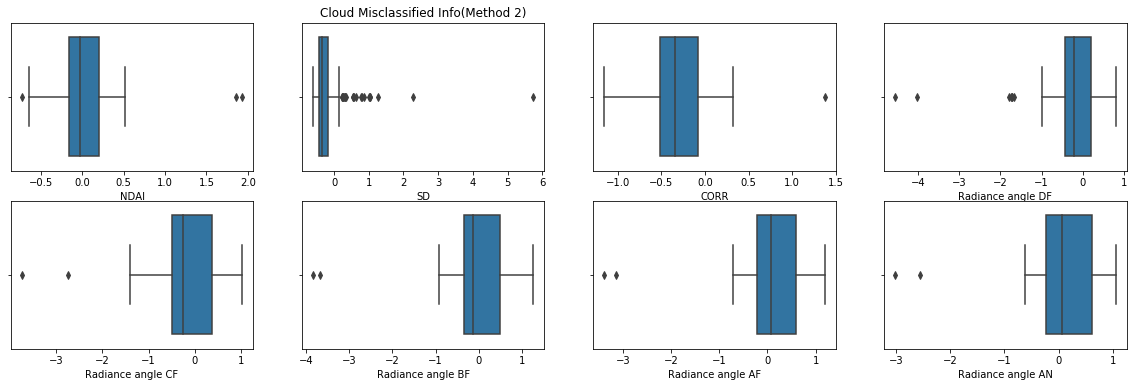

In [0]:
# Cloud data misclassified as cloudless 
fig, ((ax1, ax2, ax3,ax4),(ax5,ax6,ax7,ax8)) = plt.subplots(2, 4, figsize=(20,6))
dd=cloud_error2
sns.boxplot(dd['NDAI'],ax=ax1)
sns.boxplot(dd['SD'],ax=ax2).set_title("Cloud Misclassified Info(Method 2)")
sns.boxplot(dd['CORR'],ax=ax3)
sns.boxplot(dd['Radiance angle DF'],ax=ax4)
sns.boxplot(dd['Radiance angle CF'],ax=ax5)
sns.boxplot(dd['Radiance angle BF'],ax=ax6)
sns.boxplot(dd['Radiance angle AF'],ax=ax7)
sns.boxplot(dd['Radiance angle AN'],ax=ax8)

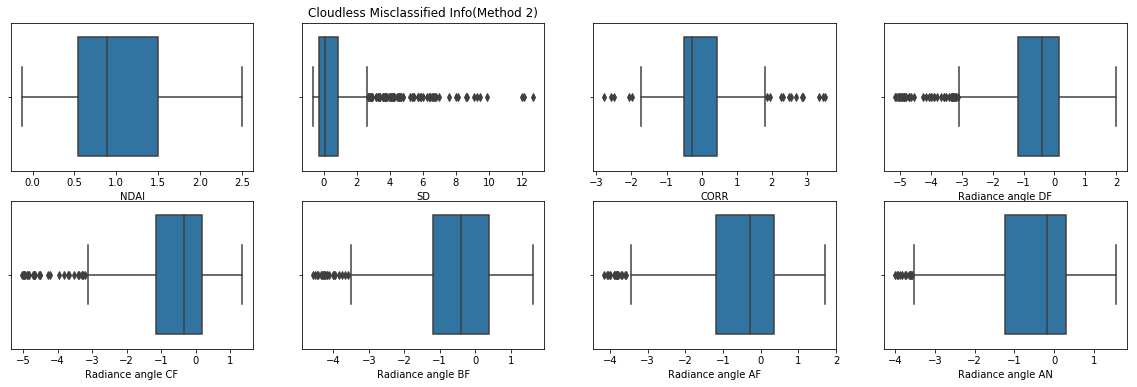

In [0]:
# Cloudless data misclassified as cloud
fig, ((ax1, ax2, ax3,ax4),(ax5,ax6,ax7,ax8)) = plt.subplots(2, 4, figsize=(20,6))
dd=nocloud_error2
sns.boxplot(dd['NDAI'],ax=ax1)
sns.boxplot(dd['SD'],ax=ax2).set_title("Cloudless Misclassified Info(Method 2)")
sns.boxplot(dd['CORR'],ax=ax3)
sns.boxplot(dd['Radiance angle DF'],ax=ax4)
sns.boxplot(dd['Radiance angle CF'],ax=ax5)
sns.boxplot(dd['Radiance angle BF'],ax=ax6)
sns.boxplot(dd['Radiance angle AF'],ax=ax7)
sns.boxplot(dd['Radiance angle AN'],ax=ax8)

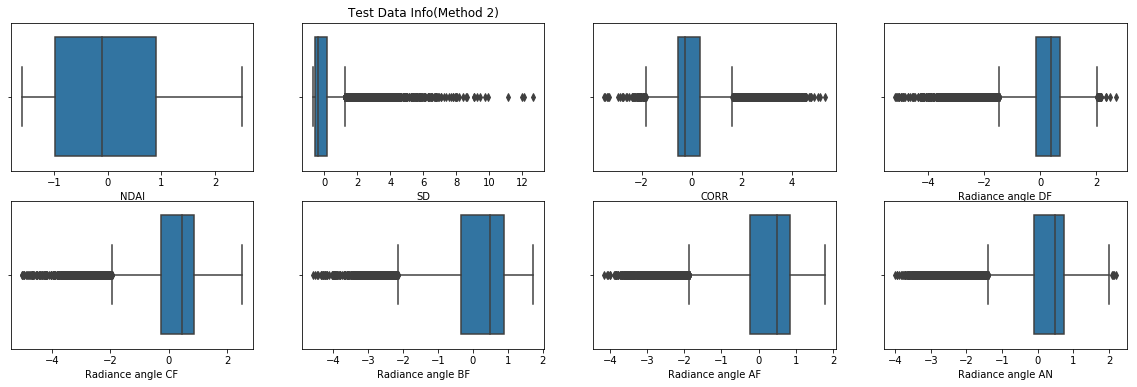

In [0]:
# Test for Method 2 Data 
fig, ((ax1, ax2, ax3,ax4),(ax5,ax6,ax7,ax8)) = plt.subplots(2, 4, figsize=(20,6))
dd=X_test2
sns.boxplot(dd['NDAI'],ax=ax1)
sns.boxplot(dd['SD'],ax=ax2).set_title("Test Data Info(Method 2)")
sns.boxplot(dd['CORR'],ax=ax3)
sns.boxplot(dd['Radiance angle DF'],ax=ax4)
sns.boxplot(dd['Radiance angle CF'],ax=ax5)
sns.boxplot(dd['Radiance angle BF'],ax=ax6)
sns.boxplot(dd['Radiance angle AF'],ax=ax7)
sns.boxplot(dd['Radiance angle AN'],ax=ax8)

### (c) Based on parts 4(a) and 4(b), can you think of a better classiffier? How well do you
think your model will work on future data without expert labels?

There are at least two ways to make it better:
1. use another classification method. Not feasible if you already tried a lot methods in section 3. 
2. use better features: what will be a good new feature to use? Some points are given if you given some intuitive explanation. Other points are given if you try it out.

#### Method 1 Data:

In [0]:
features = ['NDAI',	'SD',	'CORR']
loss_func3 = metrics.hinge_loss

#### Try all different combanitions of features, and plot out their corresponding test accuracy rate

In [0]:
features = list(dat_cor[0].columns)[3:]
classifier = neighbors.KNeighborsClassifier(n_neighbors=35)
feature_loss, feature_acc, feature_tac=[],[],[]
f = ['NDAI', 'SD', 'CORR', 'DF', 'CF','BF', 'AF', 'AN']
labs = []

for j in range(3,len(features)+1):
  for i in range(len(features) - j + 1):
    cur_los, cur_ac, cur_tac,_ = CVgeneric(clf=classifier, dat=dat_cor, \
                                                      k=3, loss_func=loss_func1, \
                 features=features[i:i+j],train_val_idx=train_val_idx,\
                 test_dat=[X_test, y_test], verbose=False)
    avg_loss= np.mean([cur_los[k] for k in cur_los.keys()])
    avg_ac = np.mean([cur_ac[k] for k in cur_ac.keys()])
    test_ac = np.mean([cur_tac[k] for k in cur_tac.keys()])
    feature_loss.append(avg_loss)
    feature_acc.append(avg_ac)
    feature_tac.append(test_ac)
    labs.append('\n'.join(f[i:i+j]))
    strr = "Average Test Accuracy(%s): " %('; '.join(f[i:i+j]))
    print(strr + " %", test_ac*100)

Average Test Accuracy(NDAI; SD; CORR):  % 95.54222244260426
Average Test Accuracy(SD; CORR; DF):  % 91.62989041503447
Average Test Accuracy(CORR; DF; CF):  % 91.40179501165271
Average Test Accuracy(DF; CF; BF):  % 90.89436538239038
Average Test Accuracy(CF; BF; AF):  % 91.25303713988198
Average Test Accuracy(BF; AF; AN):  % 90.59354390836515
Average Test Accuracy(NDAI; SD; CORR; DF):  % 94.585213467546
Average Test Accuracy(SD; CORR; DF; CF):  % 91.80178840019173
Average Test Accuracy(CORR; DF; CF; BF):  % 92.10095700897506
Average Test Accuracy(DF; CF; BF; AF):  % 91.74724384720912
Average Test Accuracy(CF; BF; AF; AN):  % 92.14723723574816
Average Test Accuracy(NDAI; SD; CORR; DF; CF):  % 94.61496504190013
Average Test Accuracy(SD; CORR; DF; CF; BF):  % 92.16211302292524
Average Test Accuracy(CORR; DF; CF; BF; AF):  % 92.44144724880582
Average Test Accuracy(DF; CF; BF; AF; AN):  % 92.48772747557892
Average Test Accuracy(NDAI; SD; CORR; DF; CF; BF):  % 94.52736318407959
Average Test A

In [0]:
import re
#print out the 3 features with the best test accuracy
tacidx = feature_tac.index(max(feature_tac))
lossidx = feature_loss.index(min(feature_loss))
re.sub("\n", "; ", labs[tacidx])

'NDAI; SD; CORR'

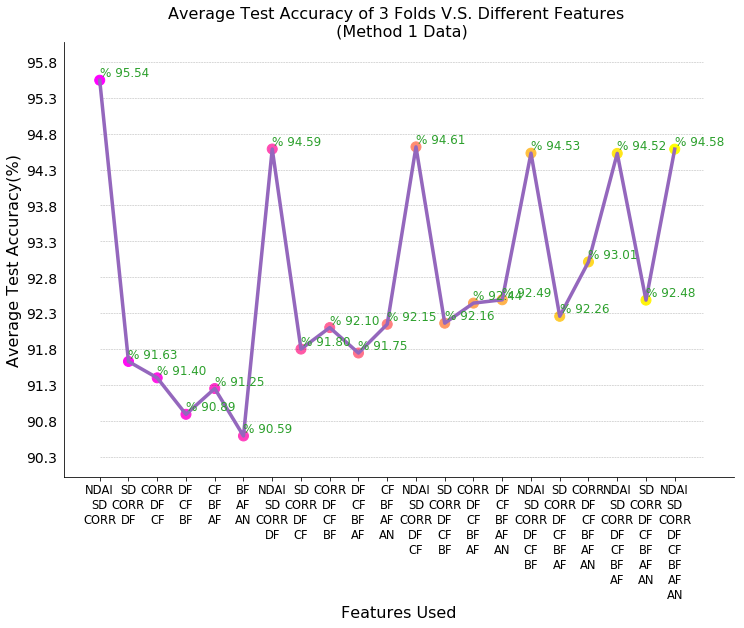

In [0]:
# Plot Feature V.S. Test Accuracy Rate on Method 1 Data
plt.figure(1000, figsize=(12, 8))
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)    
# Ensure that the axis ticks only show up on the bottom and left of the plot.    
# Ticks on the right and top of the plot are generally unnecessary chartjunk.    
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left() 
# Make sure your axis ticks are large enough to be easily read.    
# You don't want your viewers squinting to read your plot.    
plt.yticks(np.arange(90.3,96, 0.5), ["%.1f" %x 
                                           for x in np.arange(90.3,96, 0.5)], 
           fontsize=14)  
x2 = np.arange(len(feature_tac))
plt.xticks(x2,labs, fontsize=11.5)
for y in np.arange(90.3,96, 0.5):
  x = np.arange(len(feature_tac)+1)
  plt.plot(x,[y]*len(x), "--", \
             lw=0.5, color="black", alpha=0.3) 
#Remove the tick marks; they are unnecessary with the tick lines we just plotted.    
plt.tick_params(axis="both", which="both", bottom="on", top="off",    
                labelbottom="on", left="off", right="off", labelleft="on")
y = [k*100 for k in feature_tac]
plt.plot(x2, y,
         color=tableau20[8],lw=3.5)
plt.scatter(x2, y, c=x2,
           cmap = plt.cm.spring, s=100)

for i, txt in enumerate(y):
    ax.annotate("% " + "%.2f" %txt, (x2[i], txt+0.05), color=tableau20[4], 
                fontsize=12)
plt.title("Average Test Accuracy of 3 Folds V.S. Different Features \n (Method 1 Data)", 
          fontsize=16)
plt.xlabel("Features Used", fontsize=16)
plt.ylabel("Average Test Accuracy(%)", fontsize=16)
plt.show()

#### Method 2 Data:

#### Try all different combanitions of features, and plot out their corresponding test accuracy rate

In [0]:
features = list(dat_list[0].columns)[3:]
classifier = neighbors.KNeighborsClassifier(n_neighbors=35)
feature_loss2, feature_acc2, feature_tac2=[],[],[]
f = ['NDAI', 'SD', 'CORR', 'DF', 'CF','BF', 'AF', 'AN']
labs2 = []

for j in range(3,len(features)+1):
  for i in range(len(features) - j+1):
    cur_los, cur_ac, cur_tac,_ = CVgeneric(clf=classifier, dat=dat_list, \
                                                      k=3, loss_func=loss_func1, \
                 features=features[i:i+j],train_val_idx=train_val_idx2,\
                 test_dat=[X_test2, y_test2], verbose=False)
    avg_loss2= np.mean([cur_los[k] for k in cur_los.keys()])
    avg_ac2 = np.mean([cur_ac[k] for k in cur_ac.keys()])
    test_ac2 = np.mean([cur_tac[k] for k in cur_tac.keys()])
    feature_loss2.append(avg_loss2)
    feature_acc2.append(avg_ac2)
    feature_tac2.append(test_ac2)
    labs2.append('\n'.join(f[i:i+j]))
    strr = "Average Test Accuracy(%s): " %('; '.join(f[i:i+j]))
    print(strr + " %", test_ac2*100)

Average Test Accuracy(NDAI; SD; CORR):  % 94.17636750531982
Average Test Accuracy(SD; CORR; DF):  % 89.84384779071223
Average Test Accuracy(CORR; DF; CF):  % 89.77500312930279
Average Test Accuracy(DF; CF; BF):  % 89.58411565903117
Average Test Accuracy(CF; BF; AF):  % 89.2743146826887
Average Test Accuracy(BF; AF; AN):  % 89.24145700337964
Average Test Accuracy(NDAI; SD; CORR; DF):  % 95.12454625109527
Average Test Accuracy(SD; CORR; DF; CF):  % 90.94066841907623
Average Test Accuracy(CORR; DF; CF; BF):  % 90.40399299036176
Average Test Accuracy(DF; CF; BF; AF):  % 89.8047315058205
Average Test Accuracy(CF; BF; AF; AN):  % 90.17242458380274
Average Test Accuracy(NDAI; SD; CORR; DF; CF):  % 95.62679934910501
Average Test Accuracy(SD; CORR; DF; CF; BF):  % 91.10652146701716
Average Test Accuracy(CORR; DF; CF; BF; AF):  % 90.40086368757039
Average Test Accuracy(DF; CF; BF; AF; AN):  % 90.26630366754289
Average Test Accuracy(NDAI; SD; CORR; DF; CF; BF):  % 95.91000125172111
Average Test A

In [0]:
import re
#print out the 3 features with the best test accuracy
tacidx2 = feature_tac2.index(max(feature_tac2))
lossidx2 = feature_loss2.index(min(feature_loss2))
re.sub("\n", "; ", labs2[tacidx2])

'NDAI; SD; CORR; DF; CF; BF; AF; AN'

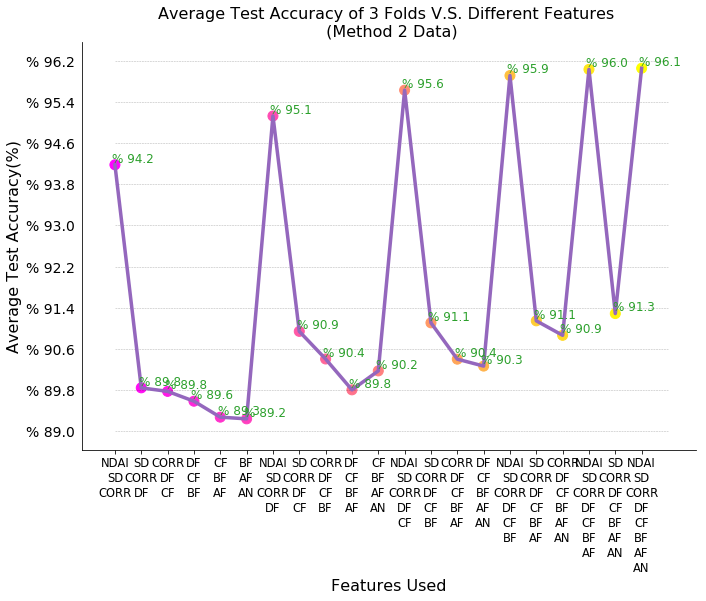

In [0]:
# Plot Feature V.S. Test Accuracy Rate on method 2 Data
plt.figure(20, figsize=(11, 7.5))
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)    
# Ensure that the axis ticks only show up on the bottom and left of the plot.    
# Ticks on the right and top of the plot are generally unnecessary chartjunk.    
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left() 
# Make sure your axis ticks are large enough to be easily read.    
# You don't want your viewers squinting to read your plot.    
plt.yticks(np.arange(89,96.6, 0.8), ['% ' +"%.1f" %x 
                                           for x in np.arange(89,96.6, 0.8)], 
           fontsize=14)  
x2 = np.arange(len(feature_tac2))
plt.xticks(x2,labs2, fontsize=11.5)
for y in np.arange(89,96.6, 0.8):
  x = np.arange(len(feature_tac2)+1)
  plt.plot(x,[y]*len(x), "--", \
             lw=0.5, color="black", alpha=0.3) 
#Remove the tick marks; they are unnecessary with the tick lines we just plotted.    
plt.tick_params(axis="both", which="both", bottom="on", top="off",    
                labelbottom="on", left="off", right="off", labelleft="on")
y = [k*100 for k in feature_tac2]
plt.plot(x2, y,
         color=tableau20[8],lw=3.5)
plt.scatter(x2, y, c=x2,
           cmap = plt.cm.spring, s=100)

for i, txt in enumerate(y):
    ax.annotate("% " + "%.1f" %txt, (x2[i]-0.1, txt+0.05), color=tableau20[4], 
                fontsize=12)
plt.title("Average Test Accuracy of 3 Folds V.S. Different Features \n (Method 2 Data)", 
          fontsize=16)
plt.xlabel("Features Used", fontsize=16)
plt.ylabel("Average Test Accuracy(%)", fontsize=16)
plt.show()